# Working Notebook for Clustering Project

By: David Schneemann

In [1]:
# regular imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math
import env

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings("ignore")

# Wrangling
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.cluster import KMeans
from scipy import stats
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr, kruskal

# Personal Imports
import acquire
import prepare
import explore
import model

## Acquire

In [2]:
df = acquire.wrangle_zillow()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        76 non-null     float64
 1   heatingorsystemtypeid         33935 non-null  float64
 2   buildingclasstypeid           0 non-null      object 
 3   architecturalstyletypeid      70 non-null     float64
 4   airconditioningtypeid         13638 non-null  float64
 5   propertylandusetypeid         52441 non-null  float64
 6   id                            52441 non-null  int64  
 7   parcelid                      52441 non-null  int64  
 8   logerror                      52441 non-null  float64
 9   transactiondate               52441 non-null  object 
 10  id                            52441 non-null  int64  
 11  parcelid                      52441 non-null  int64  
 12  basementsqft                  47 non-null     float64
 13  b

In [3]:
df.head()

,typeconstructiontypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,propertylandusetypeid,id,parcelid,logerror,transactiondate,...,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusedesc,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,typeconstructiondesc
0,NaN,NaN,None,NaN,NaN,261.00,0,14297519,0.03,2017-01-01,...,"11,013.72",None,NaN,"60,590,630,072,012.00",Single Family Residential,None,None,None,None,None
1,NaN,NaN,None,NaN,NaN,261.00,1,17052889,0.06,2017-01-01,...,"5,672.48",None,NaN,"61,110,010,023,006.00",Single Family Residential,None,None,None,None,None
2,NaN,NaN,None,NaN,NaN,261.00,2,14186244,0.01,2017-01-01,...,"6,488.30",None,NaN,"60,590,218,022,012.00",Single Family Residential,None,None,None,None,None
3,NaN,2.00,None,NaN,NaN,261.00,3,12177905,-0.10,2017-01-01,...,"1,777.51",None,NaN,"60,373,001,001,006.00",Single Family Residential,None,None,None,Central,None
4,NaN,2.00,None,NaN,1.00,261.00,6,12095076,-0.00,2017-01-01,...,"9,516.26",None,NaN,"60,374,608,001,014.00",Single Family Residential,Central,None,None,Central,None


## Prepare

In [4]:
df, train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = prepare.prep_zillow(df)

In [5]:
print(df.shape)
print(train.shape)
print(validate.shape)
print(test.shape)

(48250, 32)
(27020, 32)
(11580, 32)
(9650, 32)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27020 entries, 17293 to 1285
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27020 non-null  float64 
 1   transactiondate             27020 non-null  object  
 2   bathrooms                   27020 non-null  float64 
 3   bedrooms                    27020 non-null  int64   
 4   sq_ft                       27020 non-null  int64   
 5   finishedsquarefeet12        27020 non-null  float64 
 6   location                    27020 non-null  object  
 7   full_bathrooms              27020 non-null  float64 
 8   garage_spaces               27020 non-null  float64 
 9   garagetotalsqft             27020 non-null  float64 
 10  latitude                    27020 non-null  float64 
 11  longitude                   27020 non-null  float64 
 12  lot_sq_ft                   27020 non-null  float64 
 13  poolcnt      

### Additional Clean and Prep

## Main Exploration

In [7]:
train.loc[:, train.columns!='census_quarter_bin']

,logerror,transactiondate,bathrooms,bedrooms,sq_ft,finishedsquarefeet12,location,full_bathrooms,garage_spaces,garagetotalsqft,...,home_value,landtaxvaluedollarcnt,censustractandblock,decade_built,county_encoded,age,censustract_bin,bath_bed_ratio,census_county_bin,age_bin
17293,-0.00,2017-04-12,2.50,3,2335,"2,335.00",Ventura County,2.00,1.00,0.00,...,174786,"82,448.00","61,110,084,011,004.00",60s,2,54,2,0.83,Ventura,0.40
50005,0.03,2017-09-06,2.00,3,1361,"1,361.00",LA County,2.00,0.00,0.00,...,575000,"460,000.00","60,375,741,002,004.00",50s,0,66,0,0.67,LA,0.47
35083,0.07,2017-06-29,3.00,2,1497,"1,497.00",LA County,3.00,0.00,0.00,...,694645,"606,979.00","60,372,624,001,003.00",50s,0,62,0,1.50,LA,0.47
18080,0.13,2017-04-17,2.00,4,1430,"1,430.00",LA County,2.00,0.00,0.00,...,593920,"459,603.00","60,372,951,032,017.00",60s,0,56,0,0.50,LA,0.40
9668,-0.09,2017-03-03,2.00,2,1570,"1,570.00",LA County,2.00,0.00,0.00,...,256770,"139,632.00","60,371,345,221,003.00",40s,0,71,0,1.00,LA,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35154,-0.10,2017-06-29,3.00,3,1805,"1,805.00",LA County,3.00,0.00,0.00,...,165581,"33,115.00","60,379,107,162,000.00",80s,0,36,0,1.00,LA,0.27
1334,0.08,2017-01-10,1.00,3,914,914.00,LA County,1.00,0.00,0.00,...,58877,"14,718.00","60,379,005,011,004.00",50s,0,64,0,0.33,LA,0.47
51980,-0.06,2017-09-15,2.00,3,2294,"2,294.00",LA County,2.00,0.00,0.00,...,142177,"28,435.00","60,379,006,052,002.00",2000s,0,12,0,0.67,LA,0.13
23367,-0.27,2017-05-10,2.00,4,1424,"1,424.00",LA County,2.00,0.00,0.00,...,26038,"12,813.00","60,372,294,201,003.00",1900s,0,112,0,0.50,LA,0.80


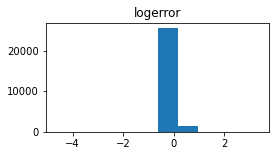

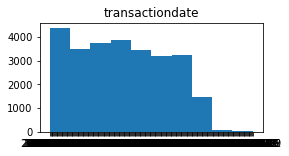

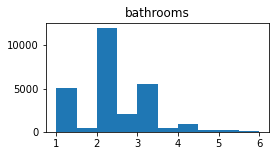

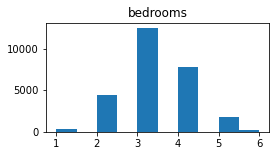

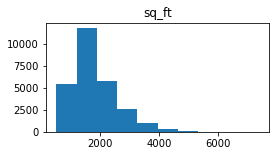

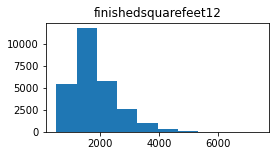

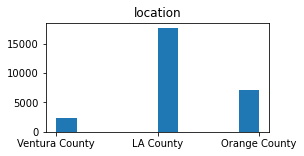

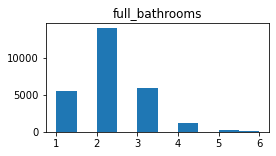

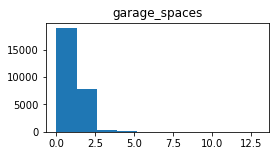

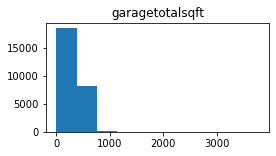

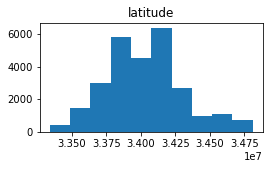

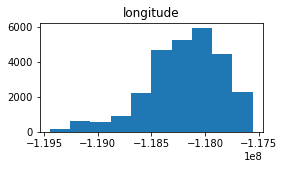

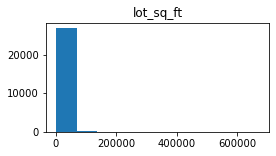

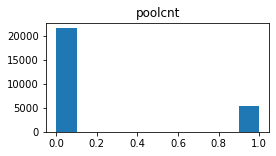

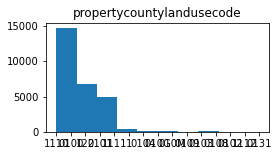

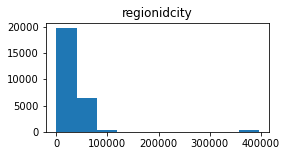

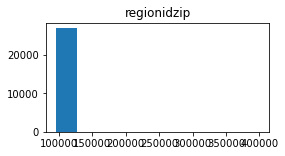

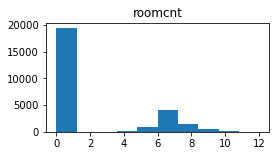

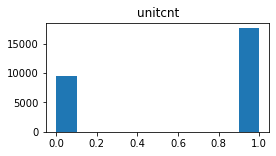

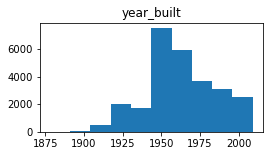

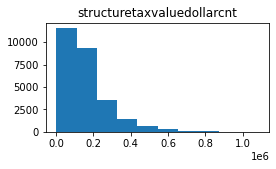

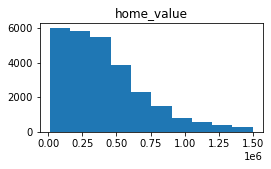

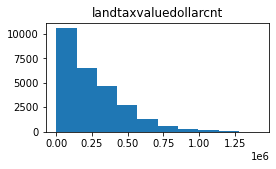

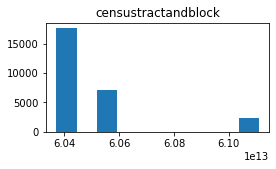

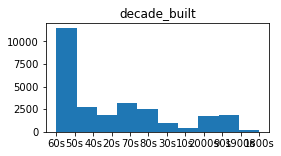

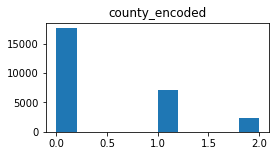

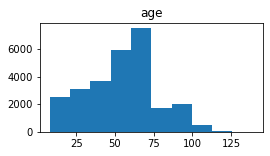

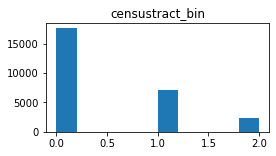

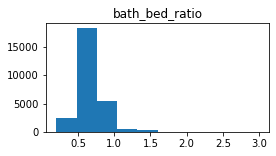

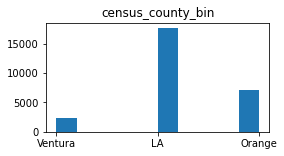

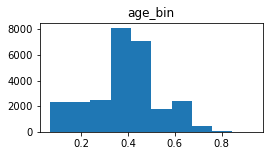

In [8]:
train1 = train.loc[:, train.columns!='census_quarter_bin']

# loop for distribution of all variables, via histogram:
for col in train1.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train1[col])
    plt.title(col)
    plt.show()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27020 entries, 17293 to 1285
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27020 non-null  float64 
 1   transactiondate             27020 non-null  object  
 2   bathrooms                   27020 non-null  float64 
 3   bedrooms                    27020 non-null  int64   
 4   sq_ft                       27020 non-null  int64   
 5   finishedsquarefeet12        27020 non-null  float64 
 6   location                    27020 non-null  object  
 7   full_bathrooms              27020 non-null  float64 
 8   garage_spaces               27020 non-null  float64 
 9   garagetotalsqft             27020 non-null  float64 
 10  latitude                    27020 non-null  float64 
 11  longitude                   27020 non-null  float64 
 12  lot_sq_ft                   27020 non-null  float64 
 13  poolcnt      

In [10]:
train_explore = train.drop(['decade_built','location','transactiondate','propertycountylandusecode','censustract_bin','census_county_bin','census_quarter_bin'], axis=1)

for col in train_explore.columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(train_explore[col])
    plt.title(col)
    plt.show()

In [11]:
cat_cols = ['bedrooms', 'bathrooms', 'garage_spaces', 'decade_built', 'location']
cont_cols = ['logerror', 'sq_ft', 'home_value', 'lot_sq_ft']

# Creating a plot loop that iterates through all combinations of variables
def plot_categorical_and_continuous_vars(train, cat_cols, cont_cols):
    train_sample = train.sample(5000)
    for cont in cont_cols:
        for cat in cat_cols:
            fig = plt.figure(figsize= (20, 10))
            fig.suptitle(f'{cont} vs {cat}')
            

            plt.subplot(131)
            sns.stripplot(data=train_sample, x = cat, y = cont)
           

            plt.subplot(1, 3, 3)
            sns.boxplot(data = train_sample, x = cont, hue = cat)
            
            
            plt.subplot(1, 3, 2)
            sns.barplot(data = train_sample, x = cat, y = cont)

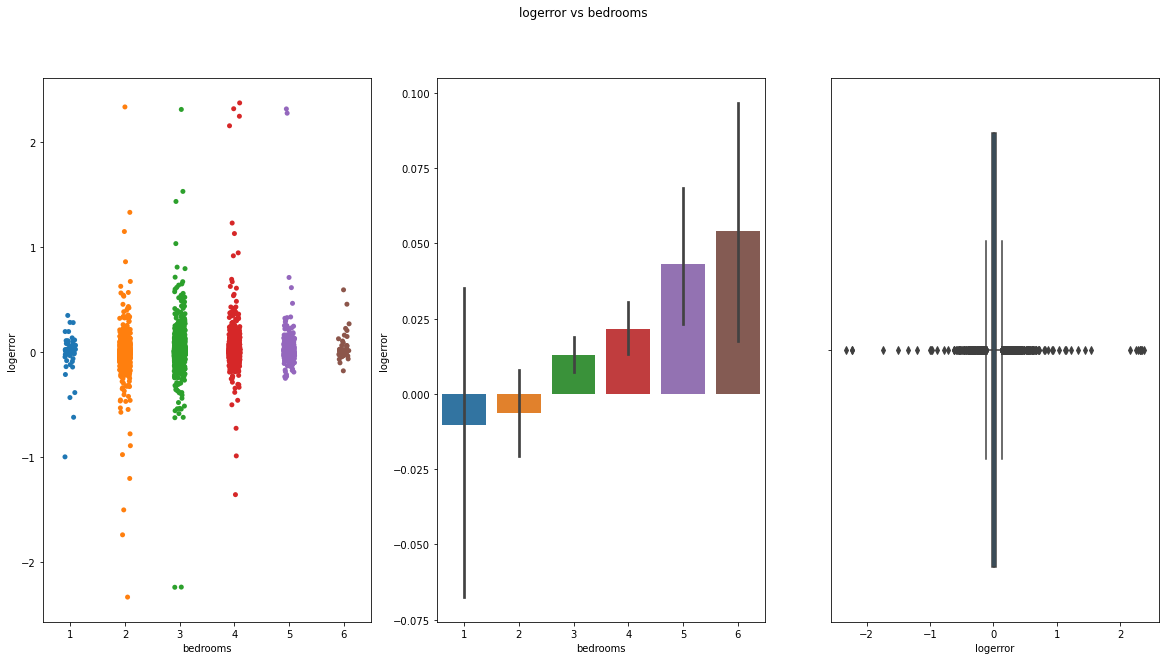

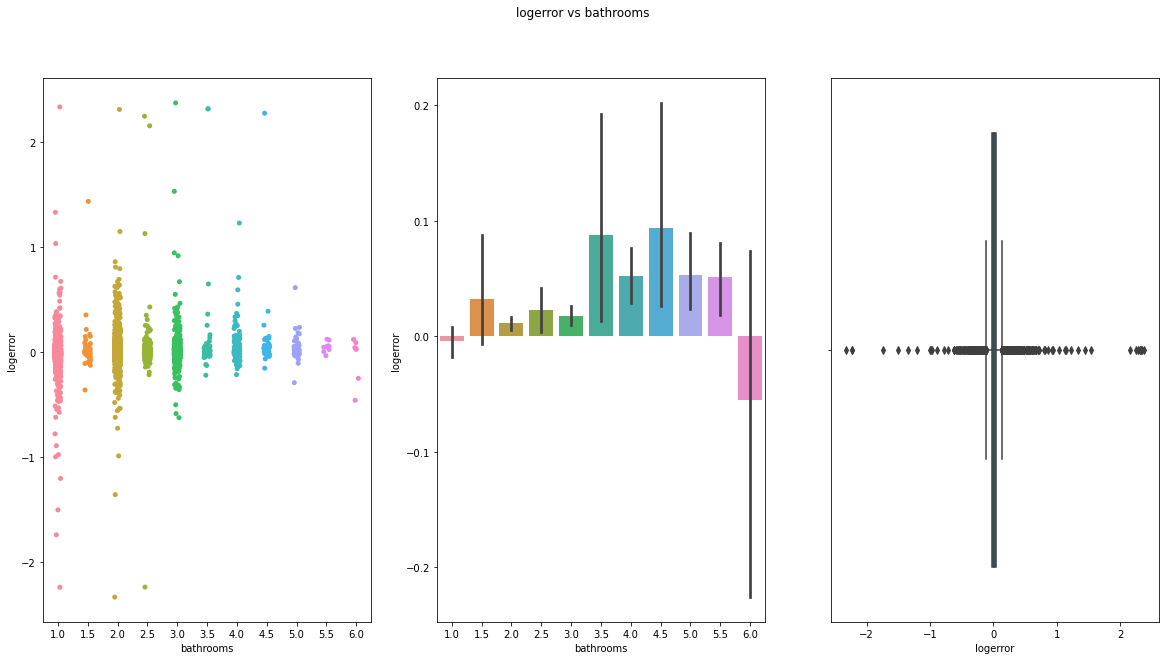

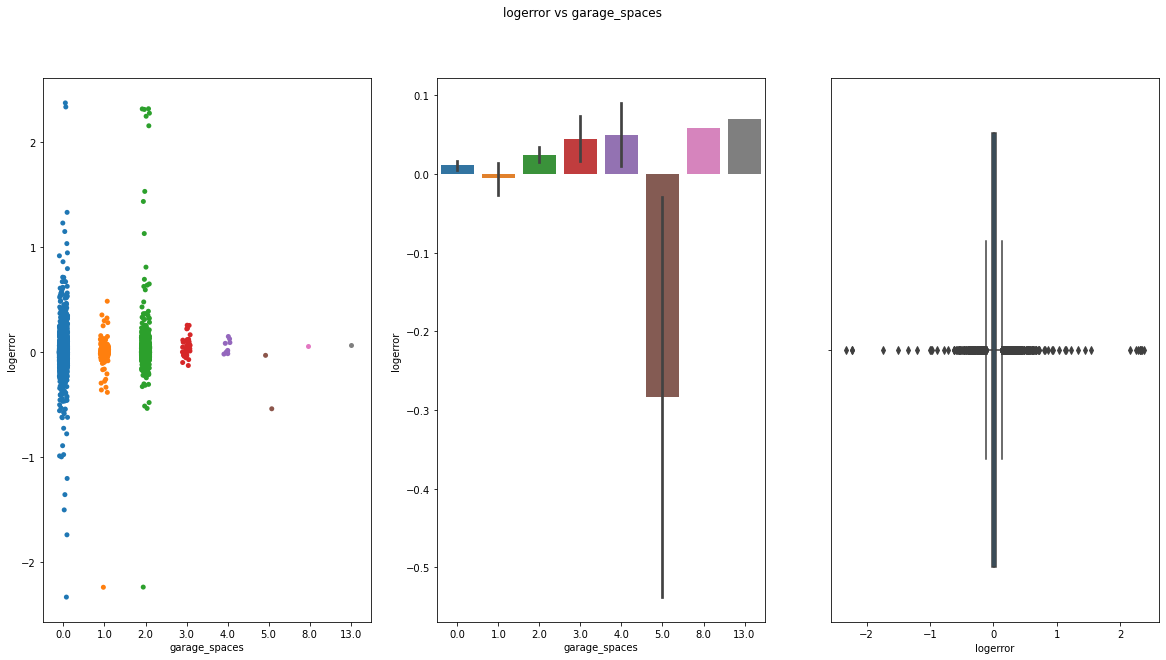

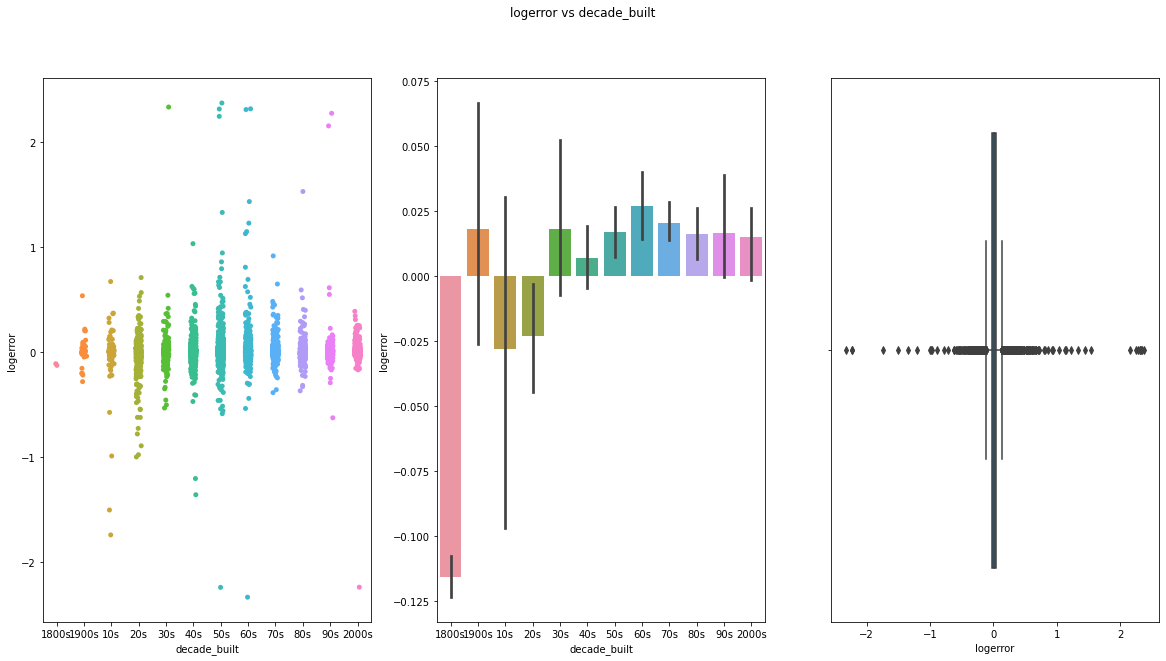

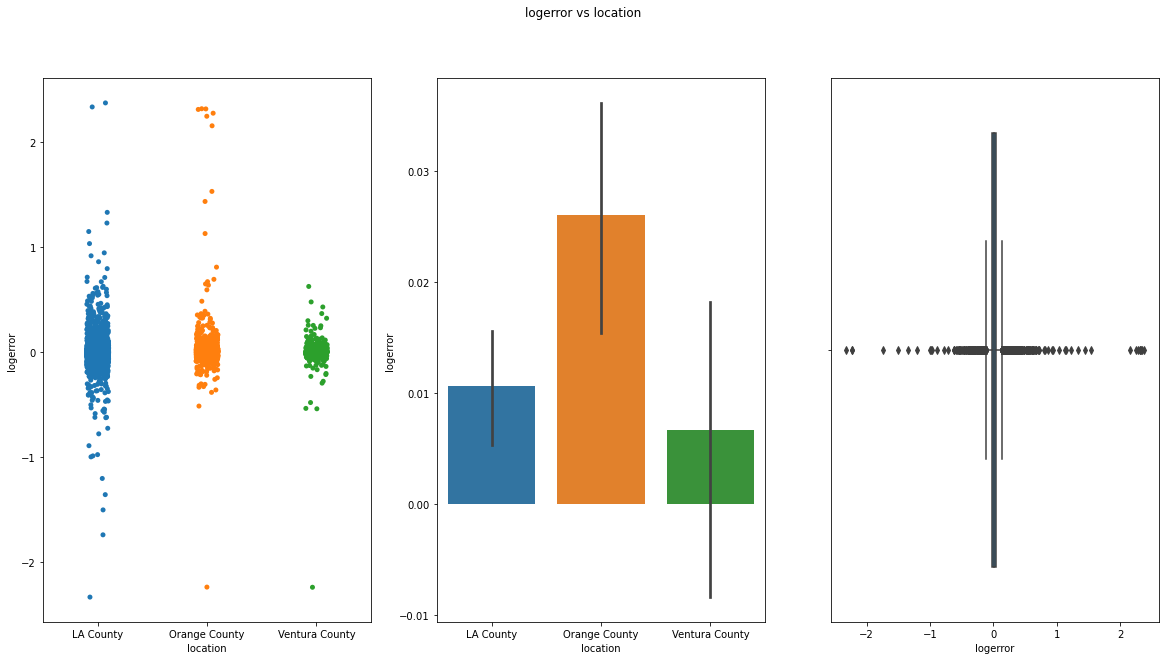

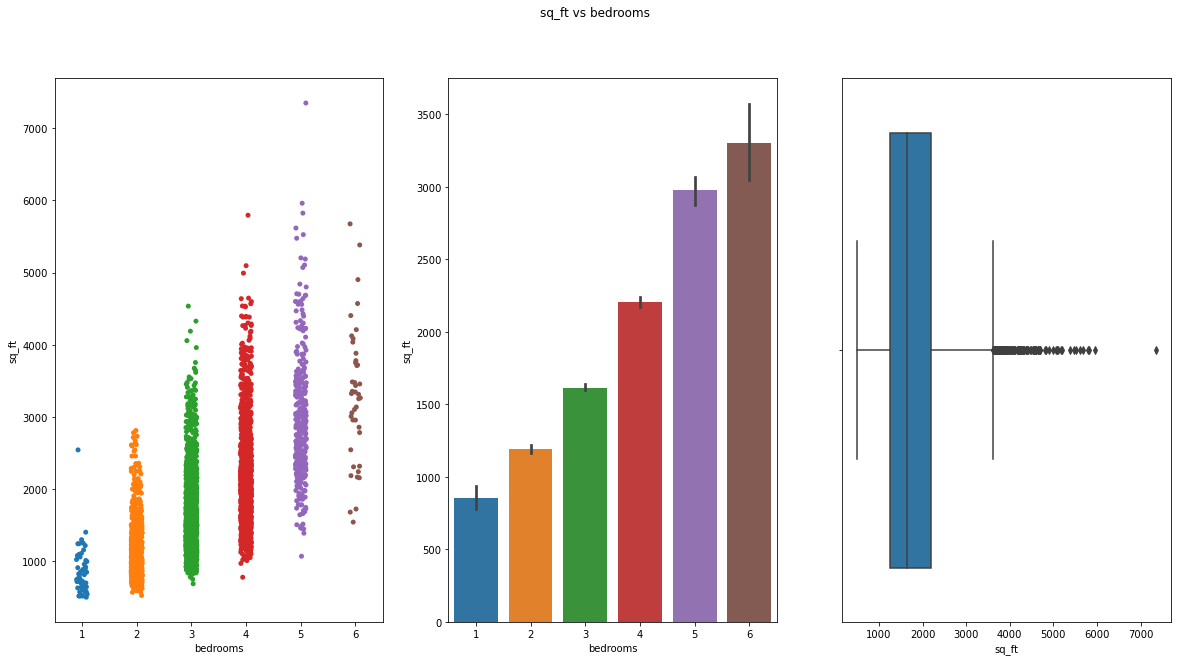

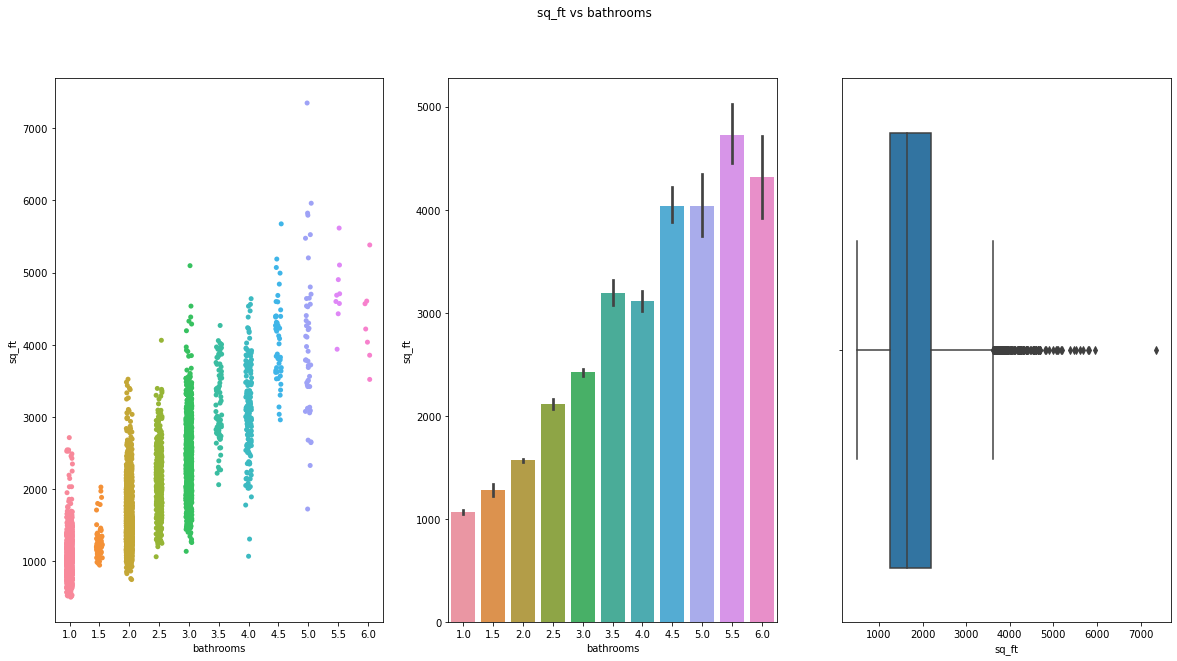

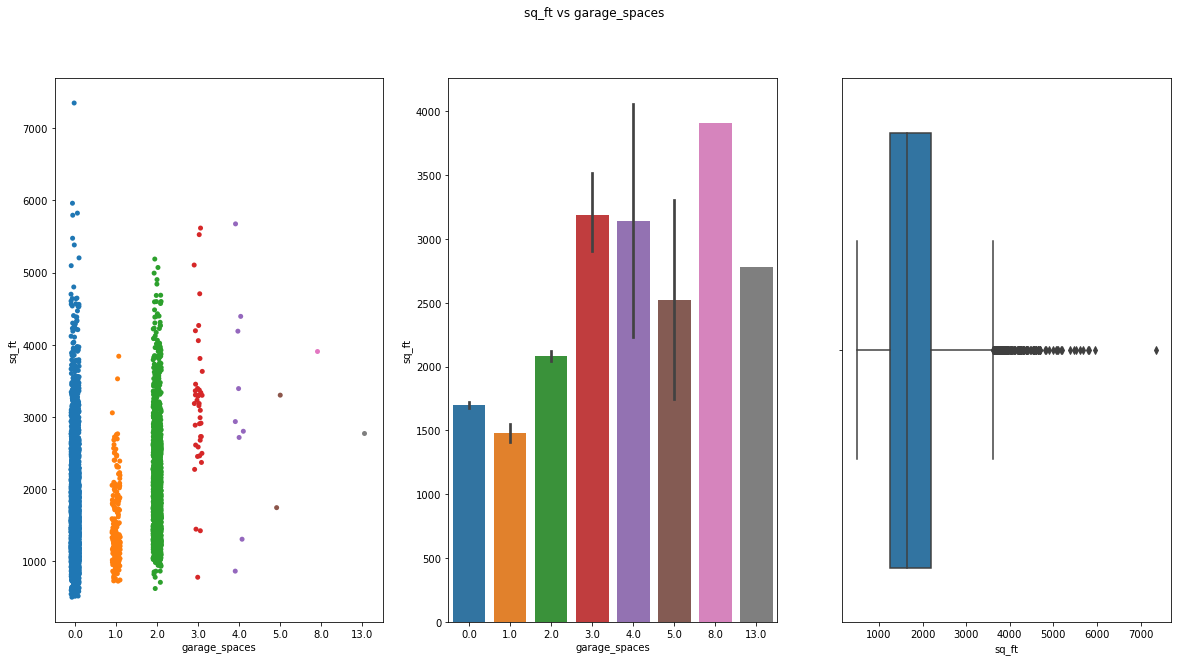

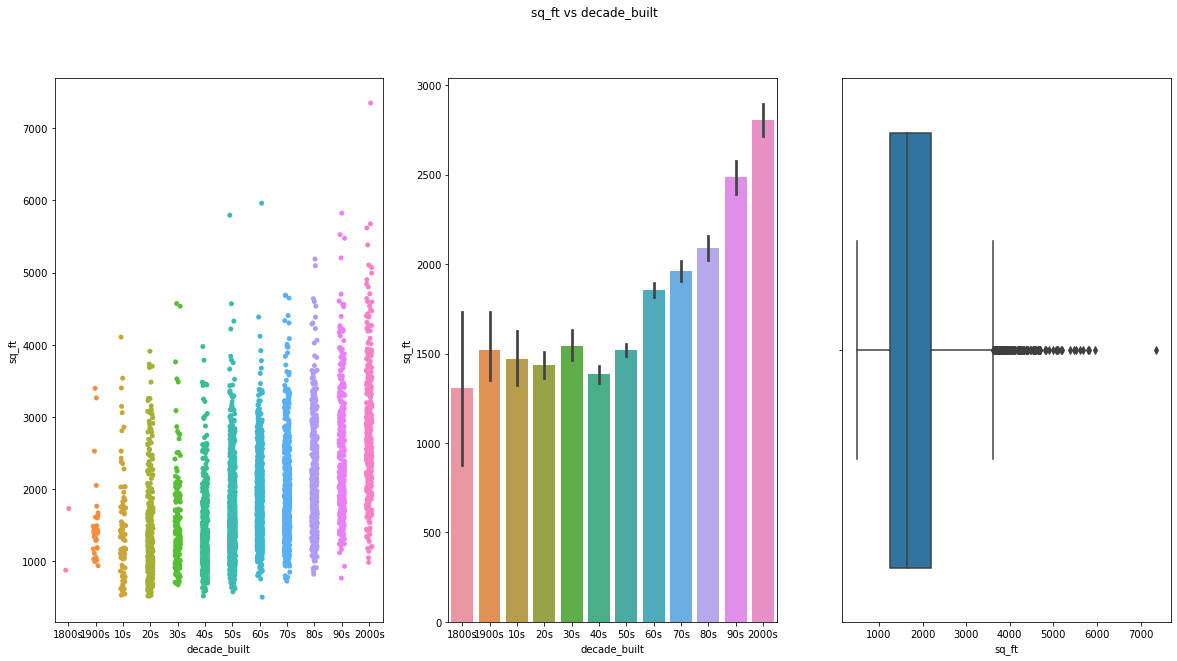

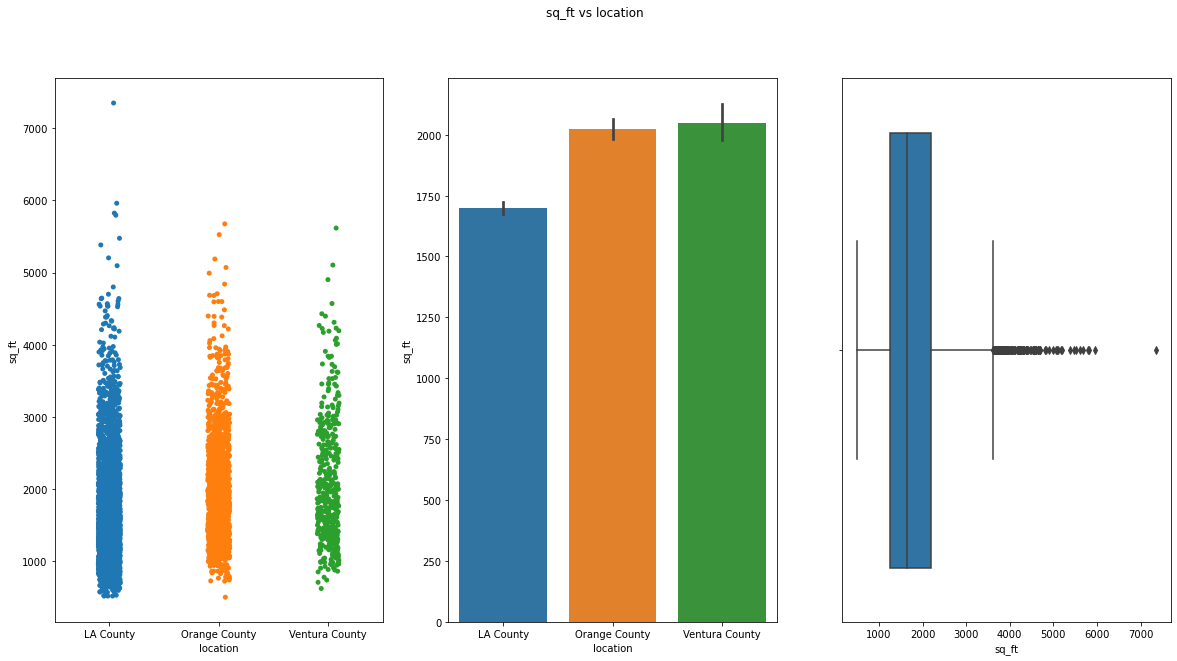

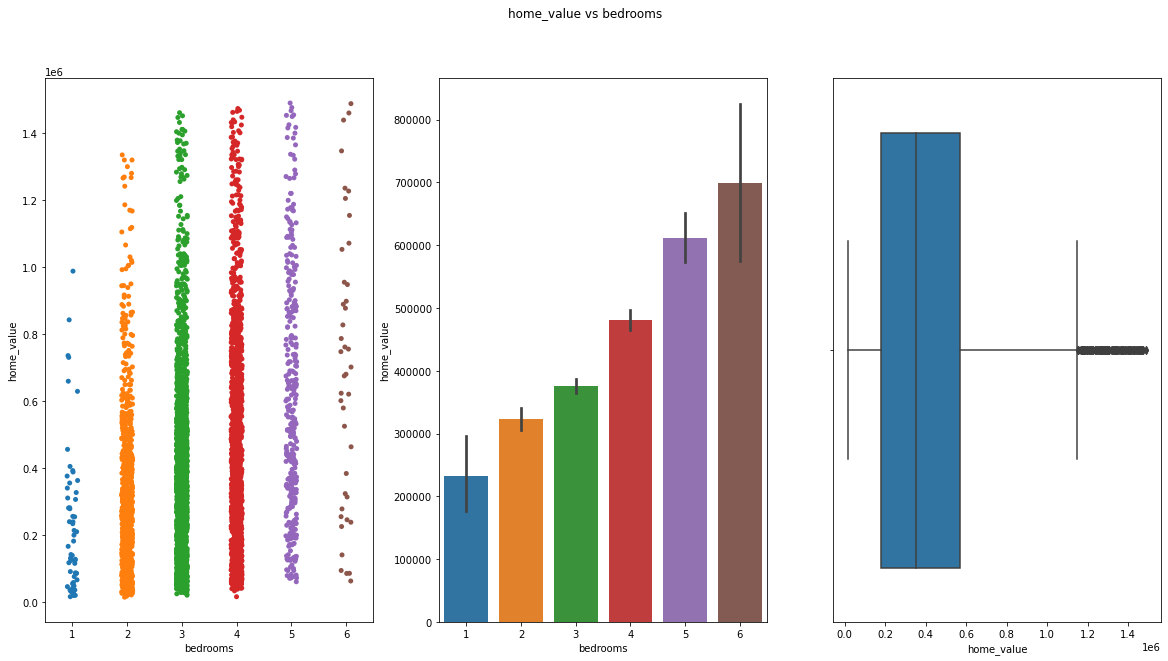

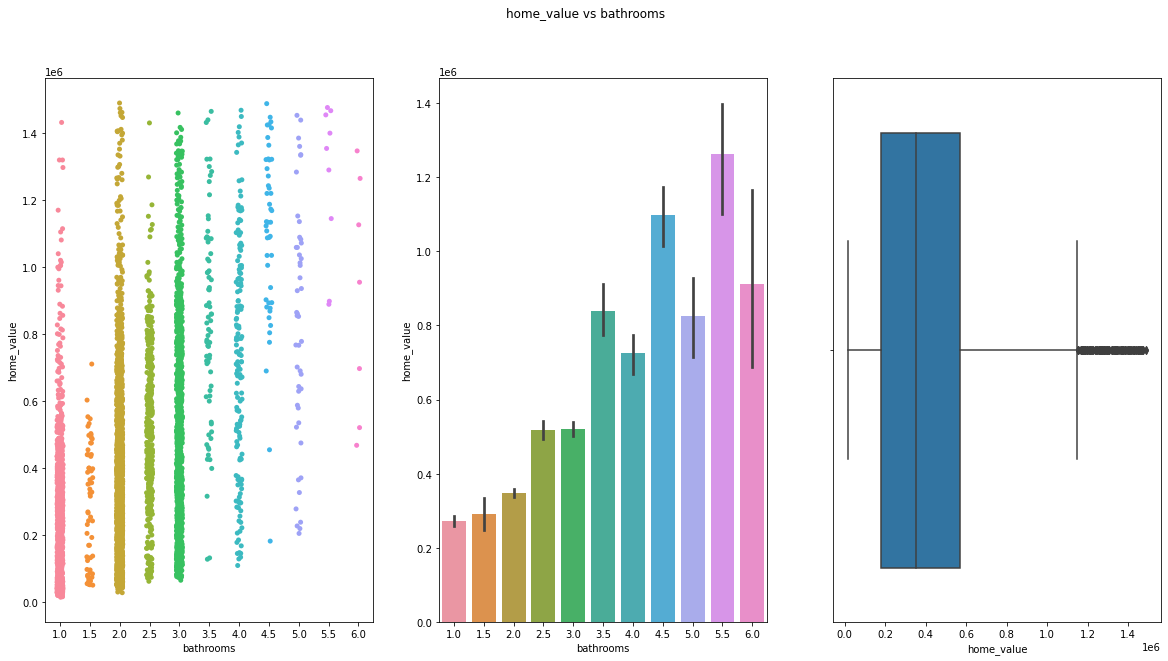

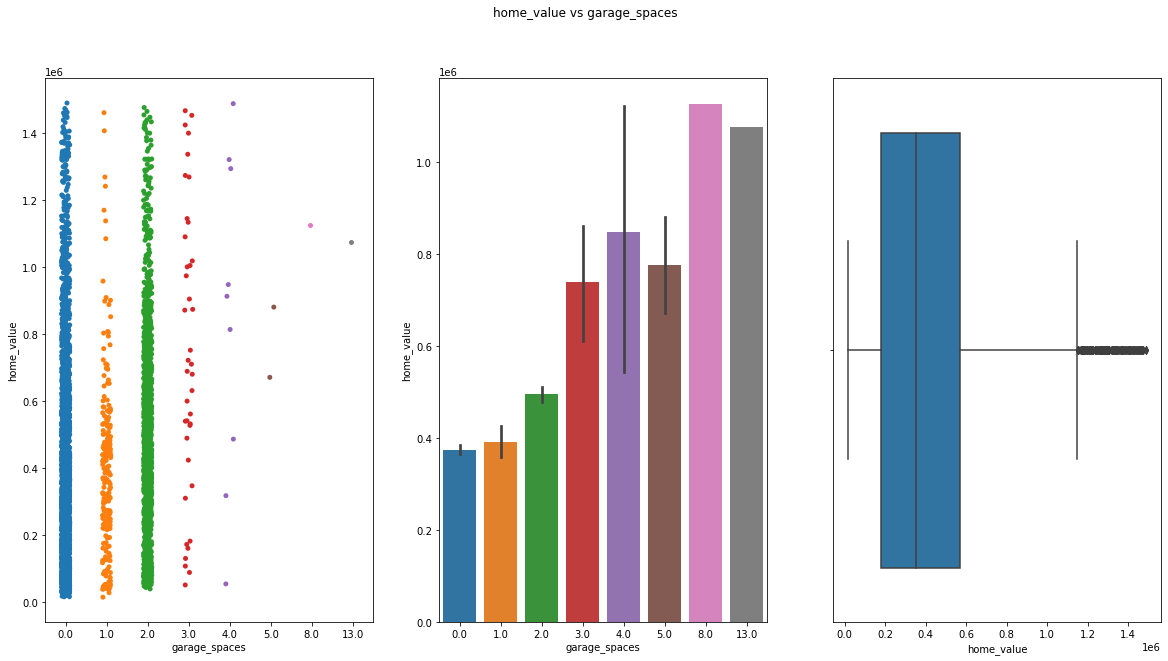

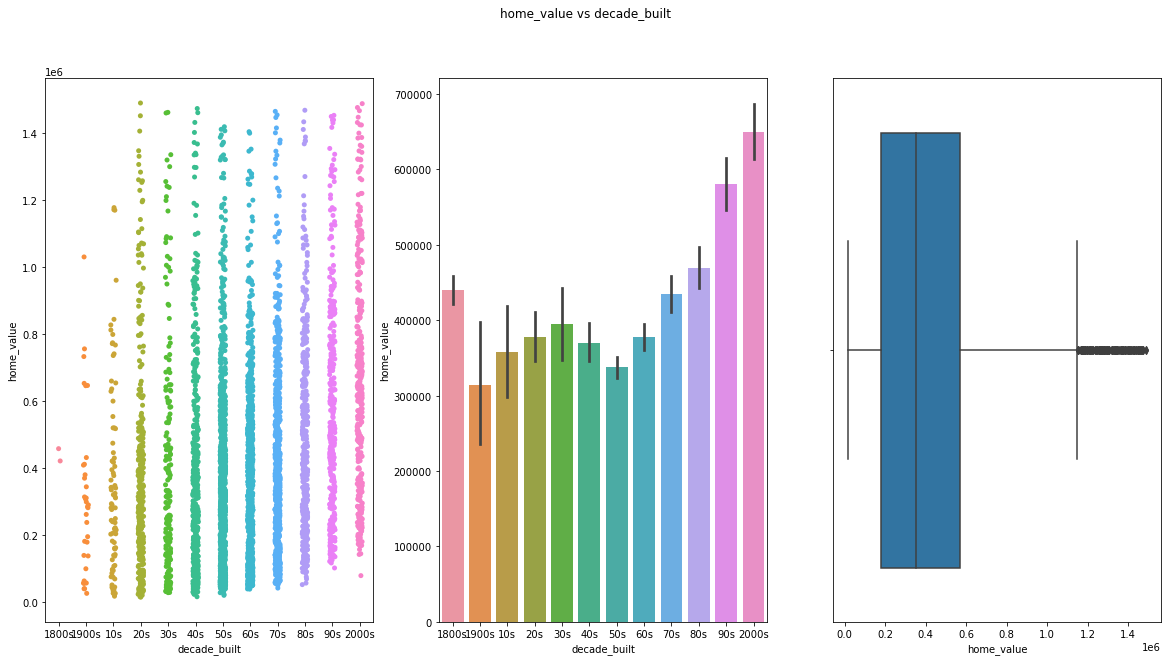

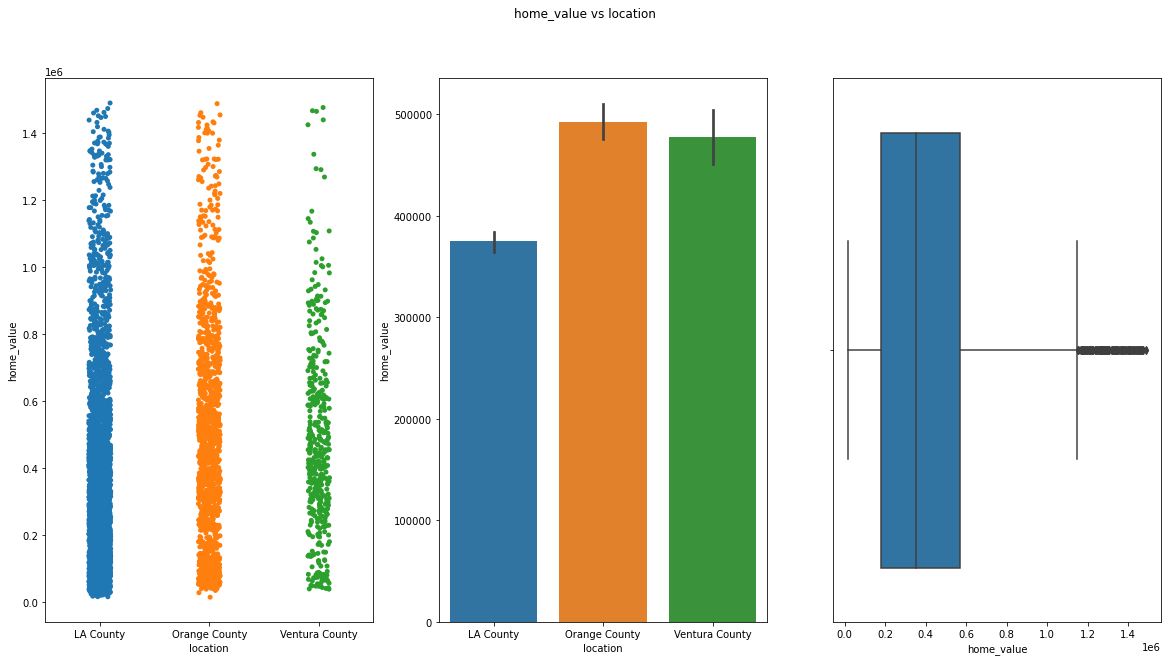

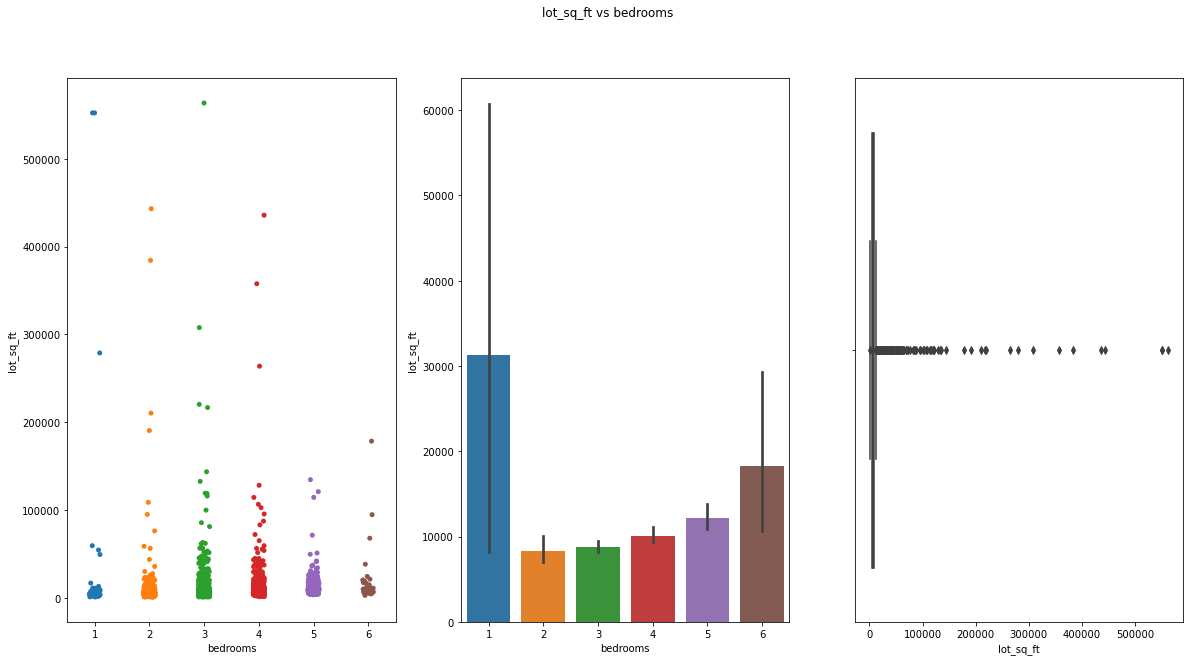

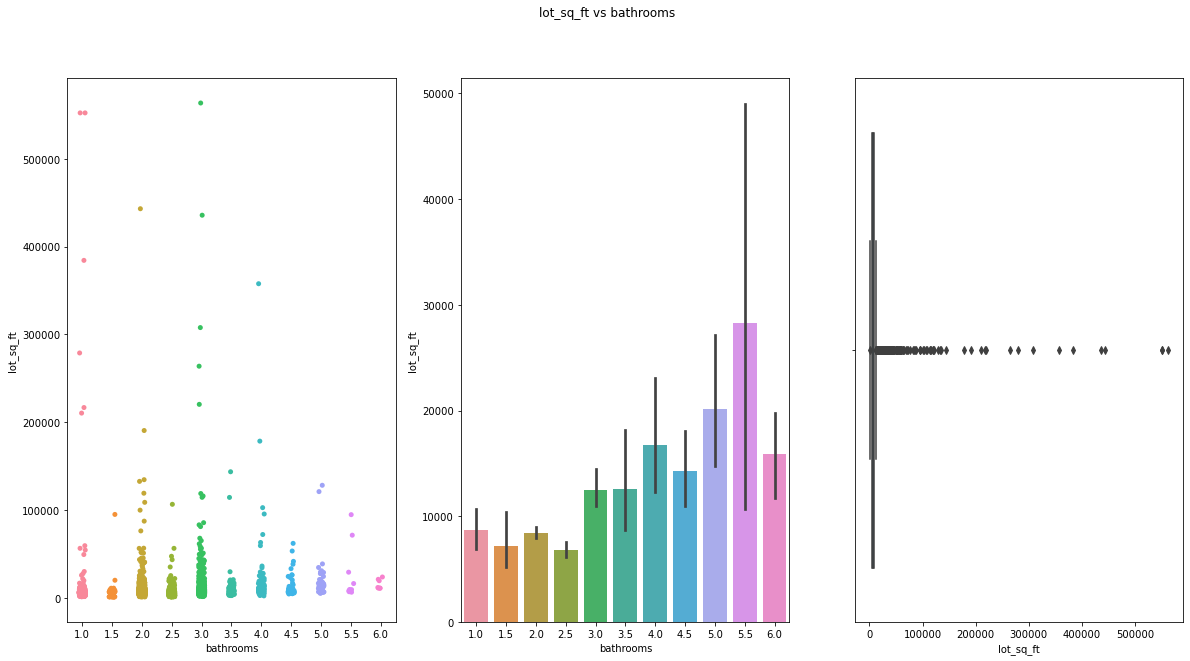

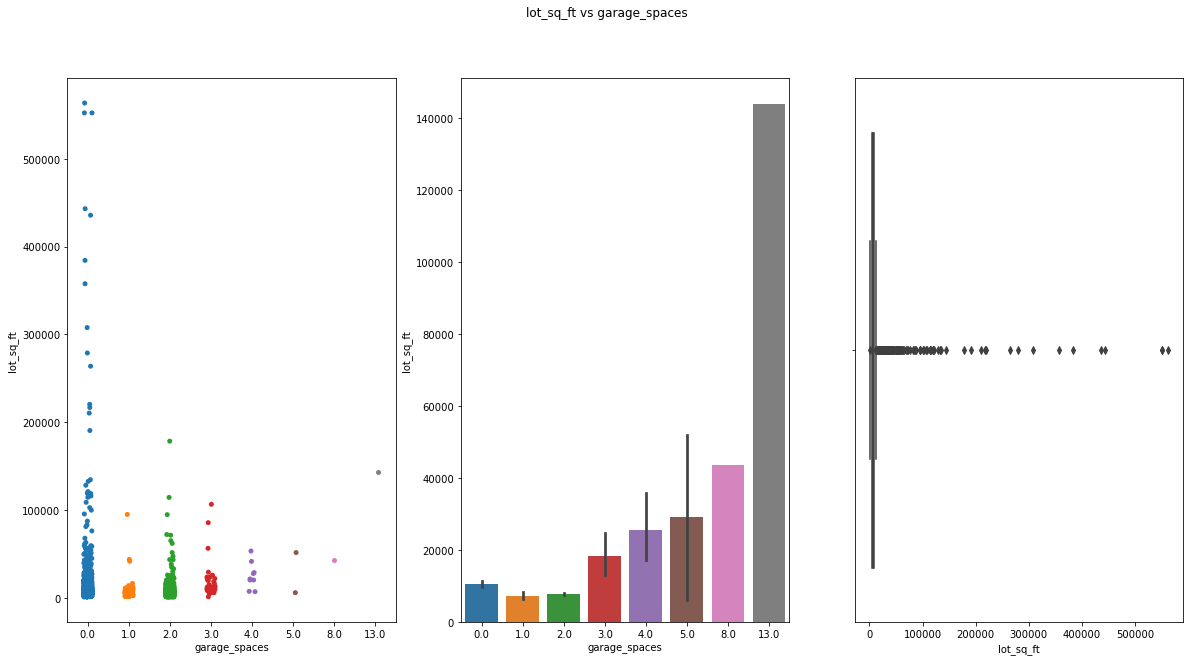

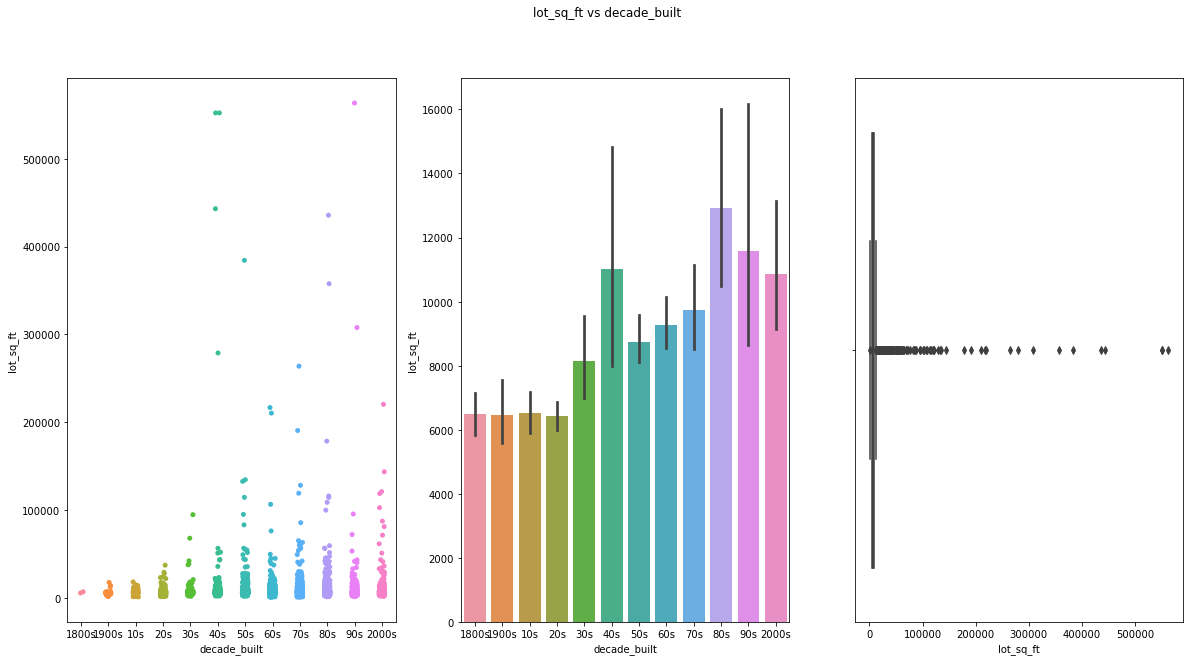

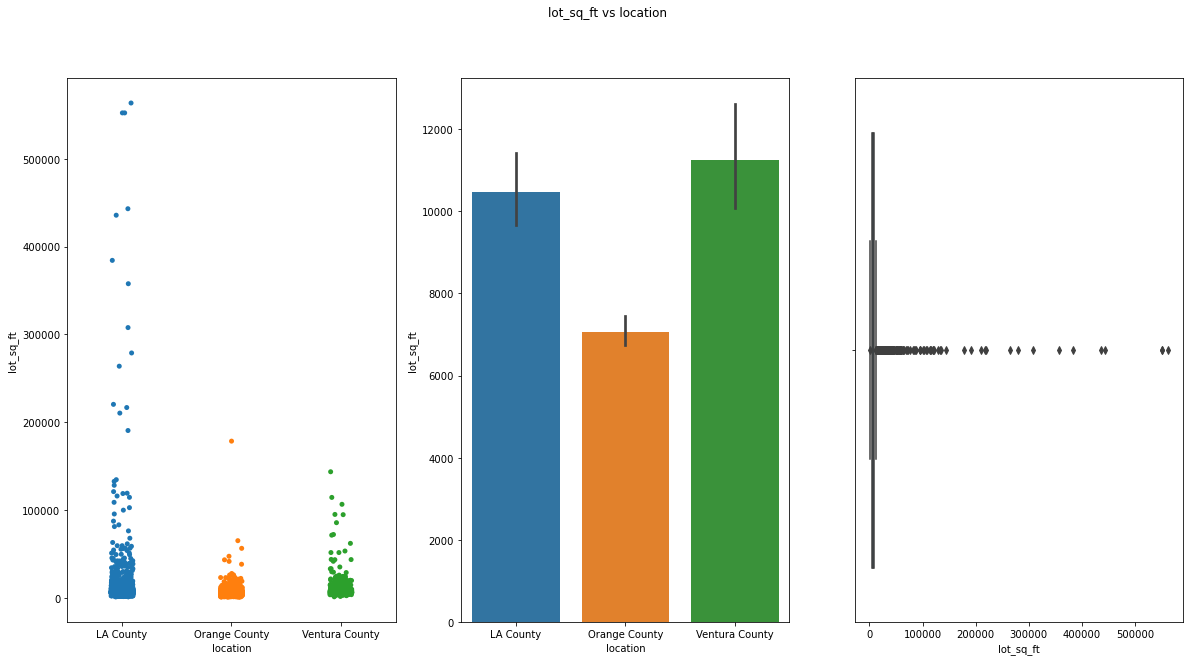

In [12]:
plot_categorical_and_continuous_vars(train, cat_cols, cont_cols)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27020 entries, 17293 to 1285
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27020 non-null  float64 
 1   transactiondate             27020 non-null  object  
 2   bathrooms                   27020 non-null  float64 
 3   bedrooms                    27020 non-null  int64   
 4   sq_ft                       27020 non-null  int64   
 5   finishedsquarefeet12        27020 non-null  float64 
 6   location                    27020 non-null  object  
 7   full_bathrooms              27020 non-null  float64 
 8   garage_spaces               27020 non-null  float64 
 9   garagetotalsqft             27020 non-null  float64 
 10  latitude                    27020 non-null  float64 
 11  longitude                   27020 non-null  float64 
 12  lot_sq_ft                   27020 non-null  float64 
 13  poolcnt      

In [14]:
train.propertycountylandusecode.value_counts()

0100    14194
122      6742
0101     3117
1111     1800
1110      501
1         362
0104      177
010G       44
0108       30
010M       25
0103       22
0109        2
0102        2
1112        1
0131        1
Name: propertycountylandusecode, dtype: int64

In [15]:
cat_cols = ['bedrooms', 'bathrooms', 'garage_spaces', 'decade_built', 'location', 'poolcnt', 'propertycountylandusecode']
cont_cols = ['logerror']

# Creating a plot loop that iterates through all combinations of variables
def plot_categorical_and_continuous_vars(train, cat_cols, cont_cols):
    train_sample = train.sample(5000)
    for cont in cont_cols:
        for cat in cat_cols:
            fig = plt.figure(figsize= (20, 10))
            fig.suptitle(f'{cont} vs {cat}')
            

            plt.subplot(131)
            sns.stripplot(data=train_sample, x = cat, y = cont)
           

            plt.subplot(1, 3, 3)
            sns.boxplot(data = train_sample, x = cont, hue = cat)
            
            
            plt.subplot(1, 3, 2)
            sns.barplot(data = train_sample, x = cat, y = cont)

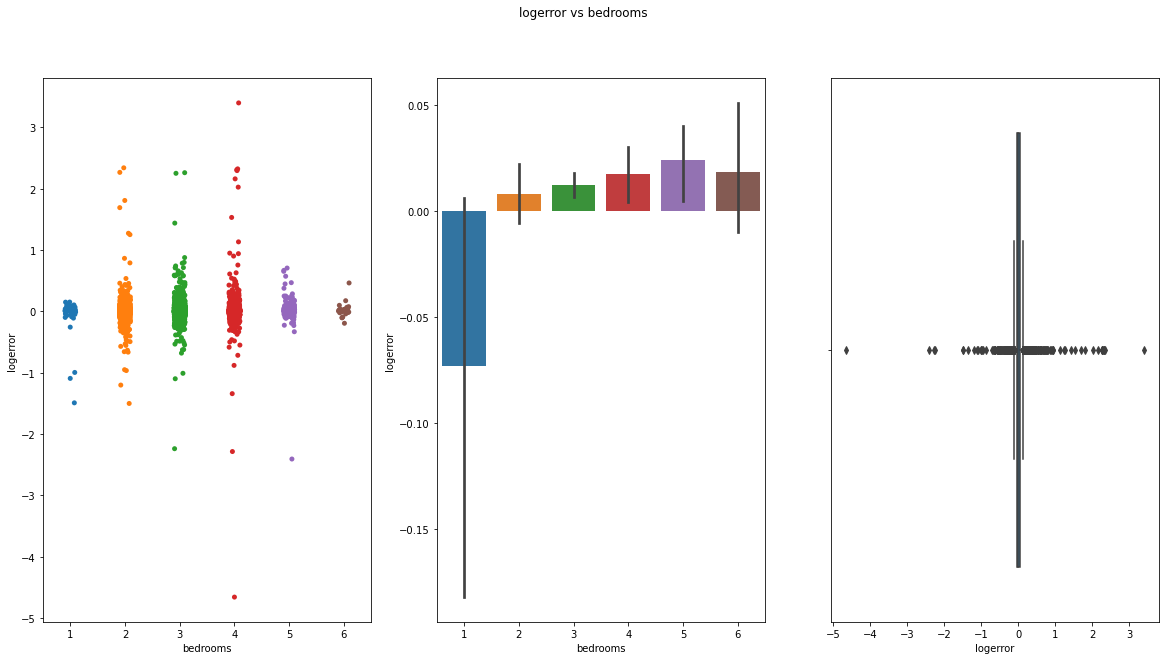

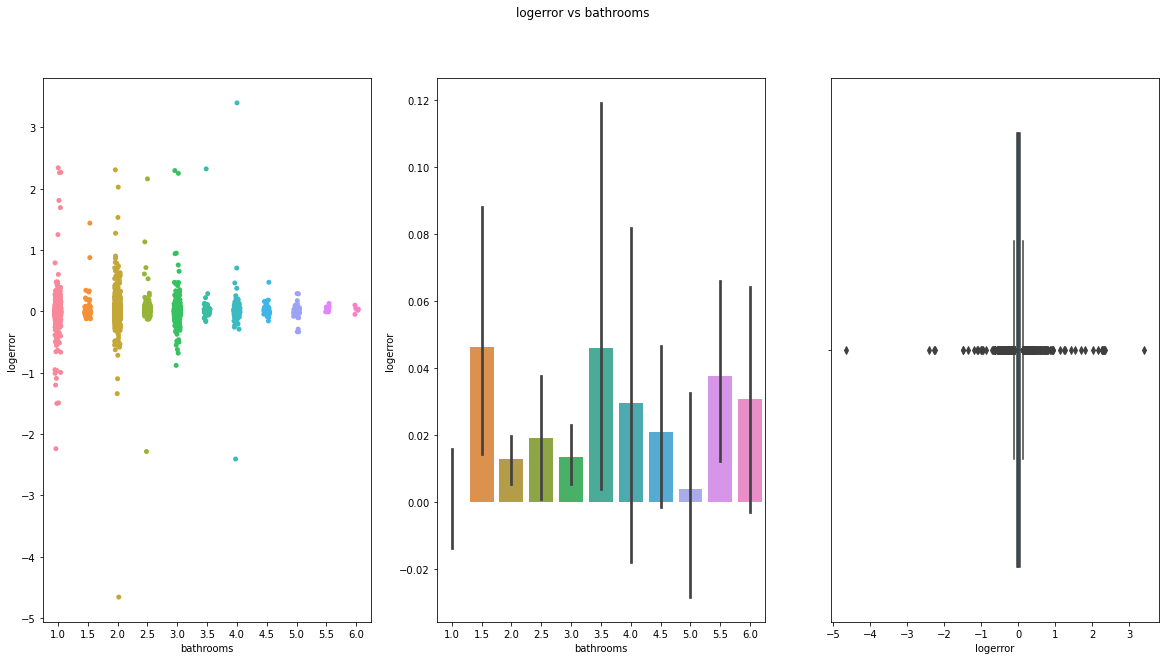

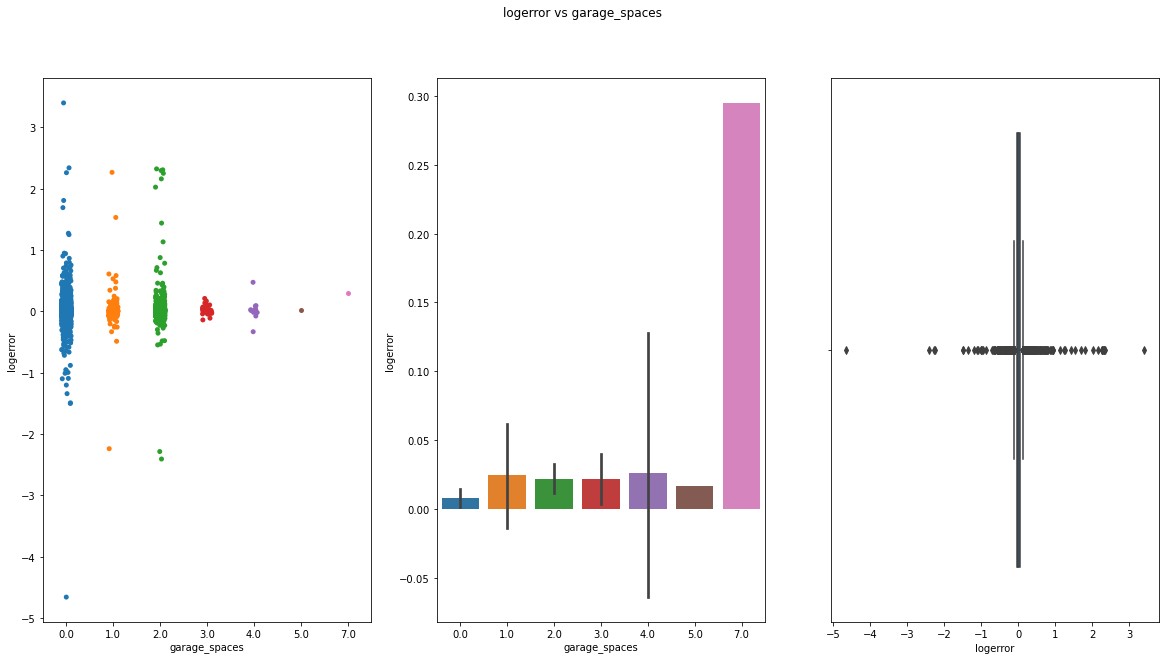

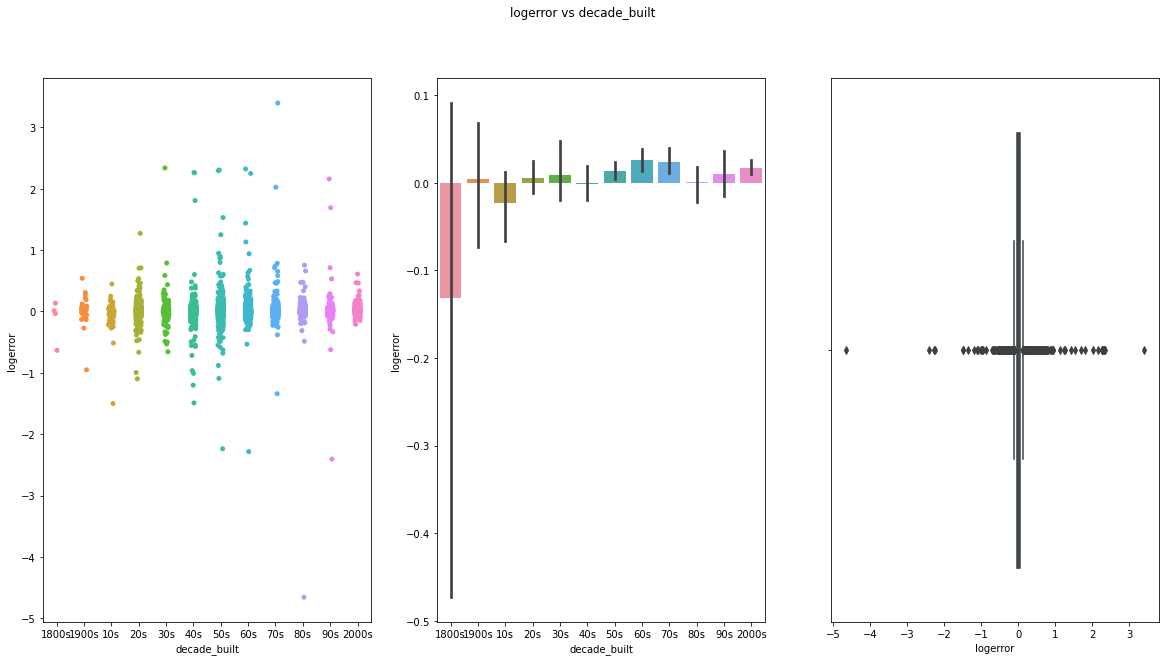

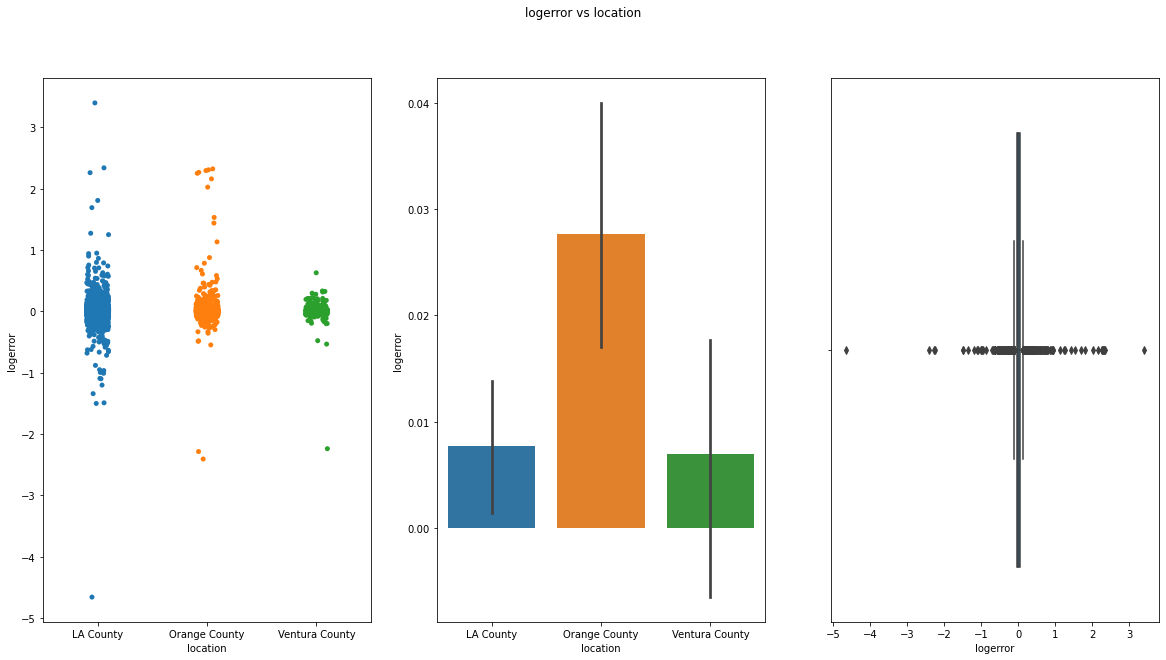

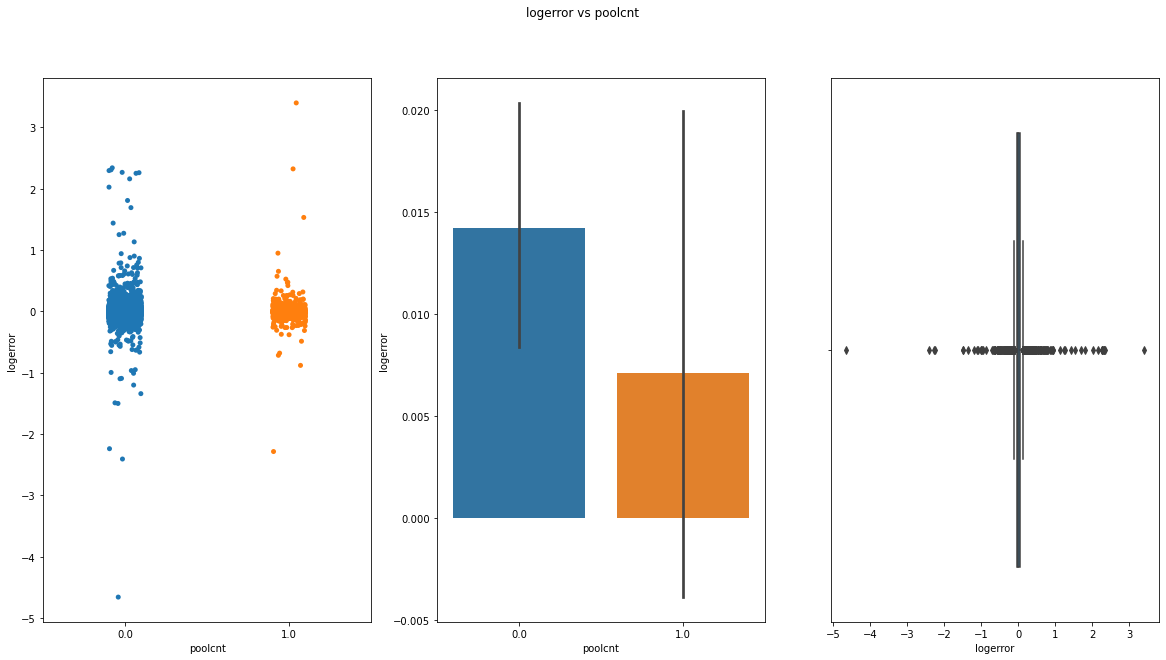

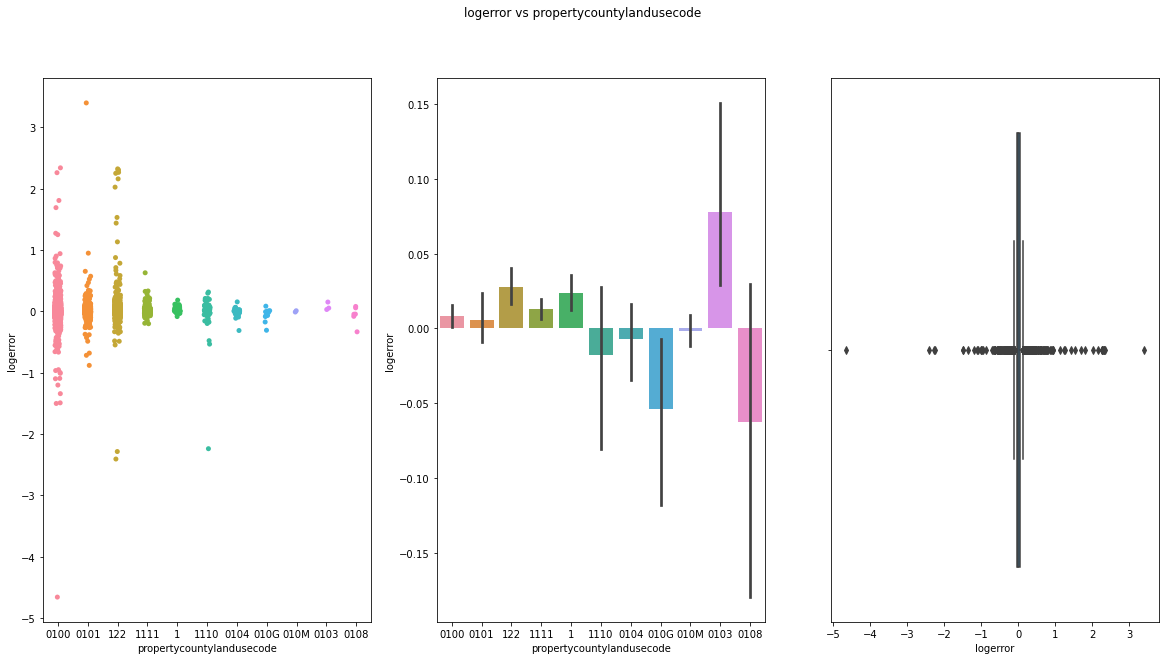

In [16]:
plot_categorical_and_continuous_vars(train, cat_cols, cont_cols)

In [17]:
print(train.latitude.nunique())
train.latitude.value_counts()

26534


34,047,500.00    6
33,494,800.00    5
34,176,517.00    3
34,183,332.00    3
33,770,991.00    3
                ..
34,101,593.00    1
34,046,206.00    1
34,134,496.00    1
33,961,839.00    1
33,871,425.00    1
Name: latitude, Length: 26534, dtype: int64

In [18]:
print(train.longitude.nunique())
train.longitude.value_counts()

26589


-118,249,000.00    6
-117,670,000.00    5
-117,849,000.00    4
-118,101,919.00    3
-118,398,581.00    3
                  ..
-117,783,375.00    1
-117,865,351.00    1
-118,151,705.00    1
-118,243,568.00    1
-118,084,603.00    1
Name: longitude, Length: 26589, dtype: int64

In [19]:
train.longitude.nunique()

26589

In [20]:
train.location.value_counts()

LA County         17614
Orange County      7104
Ventura County     2302
Name: location, dtype: int64

In [21]:
train.censustract_bin.value_counts()

0    17614
1     7104
2     2302
Name: censustract_bin, dtype: int64

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27020 entries, 17293 to 1285
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27020 non-null  float64 
 1   transactiondate             27020 non-null  object  
 2   bathrooms                   27020 non-null  float64 
 3   bedrooms                    27020 non-null  int64   
 4   sq_ft                       27020 non-null  int64   
 5   finishedsquarefeet12        27020 non-null  float64 
 6   location                    27020 non-null  object  
 7   full_bathrooms              27020 non-null  float64 
 8   garage_spaces               27020 non-null  float64 
 9   garagetotalsqft             27020 non-null  float64 
 10  latitude                    27020 non-null  float64 
 11  longitude                   27020 non-null  float64 
 12  lot_sq_ft                   27020 non-null  float64 
 13  poolcnt      

## Initial Questions and Hypotheses

#### 1. Does a higher number of bedrooms increase logerror?

- Ho = More bedrooms translates to <= logerror
- Ha = More bedrooms translates to > logerror

#### 2. Does a higher number of bathrooms increase logerror?

- Ho = More bathrooms translates to <= logerror
- Ha = More bathrooms translates to > logerror

#### 3. Do more garage spaces increase logerror?

- Ho = More garage spaces translates to <= logerror
- Ha = More garage spaces translates to > logerror

#### 4. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

- Ho = Population Means of the logerrors for Orange county, LA County, and Ventura County are all equal
- Ha = Population Means of the logerrors for Orange county, LA County, and Ventura County are NOT all equal

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27020 entries, 17293 to 1285
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27020 non-null  float64 
 1   transactiondate             27020 non-null  object  
 2   bathrooms                   27020 non-null  float64 
 3   bedrooms                    27020 non-null  int64   
 4   sq_ft                       27020 non-null  int64   
 5   finishedsquarefeet12        27020 non-null  float64 
 6   location                    27020 non-null  object  
 7   full_bathrooms              27020 non-null  float64 
 8   garage_spaces               27020 non-null  float64 
 9   garagetotalsqft             27020 non-null  float64 
 10  latitude                    27020 non-null  float64 
 11  longitude                   27020 non-null  float64 
 12  lot_sq_ft                   27020 non-null  float64 
 13  poolcnt      

#### 1. Does a higher number of bedrooms increase logerror?

- Ho = More bedrooms translates to <= logerror
- Ha = More bedrooms translates to > logerror

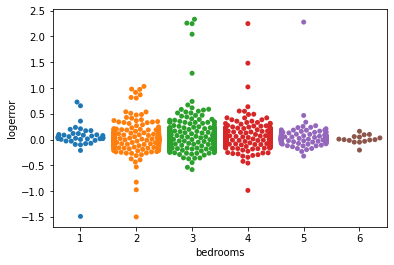

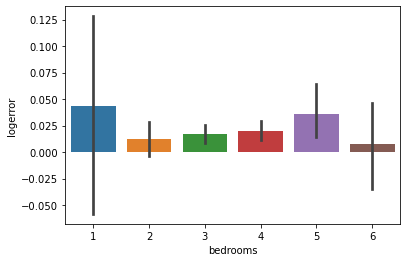

In [24]:
# Calling explore.py; applying plot function to 'bedrooms' and 'home_value'
explore.plot_categorical_and_continuous_vars(df, 'bedrooms', 'logerror')

In [25]:
# Use the scipy stats function pearsonr to calculate the correlation coefficient and the p-value.
alpha = 0.05

r_bed , p_bed = pearsonr(x = train['bedrooms'], y = train['logerror'])

r_bed , p_bed

if p_bed < alpha:
    print('The number of bedrooms is correlated with logerror.')
    print('The correlation coefficient is {}.'.format(r_bed))
else:
    print('The number of bedrooms is NOT correlated with logerror.')

The number of bedrooms is correlated with logerror.
The correlation coefficient is 0.038875245230531076.


#### Answer 1 : Yes,  higher numbers of bedrooms correlate with higher logerror
Following our statistical test, we indicate that this feature is correlated with logerror, meaning that there is statistical significance behind the claim that more bedrooms results in a higher logerror. Thus we move forward with this feature.

#### 2. Does a higher number of bathrooms increase logerror?

- Ho = More bathrooms translates to <= logerror
- Ha = More bathrooms translates to > logerror

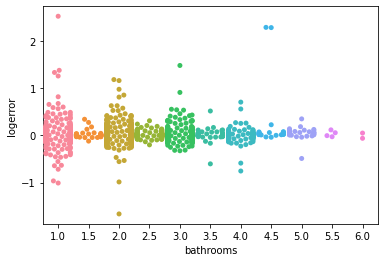

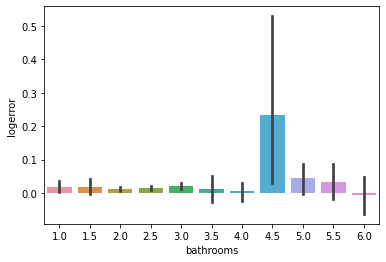

In [26]:
# Calling explore.py; applying plot function to 'bathrooms' and 'home_value'
explore.plot_categorical_and_continuous_vars(train, 'bathrooms', 'logerror')

In [27]:
# Use the scipy stats function pearsonr to calculate the correlation coefficient and the p-value.
alpha = 0.05

r_bath , p_bath = pearsonr(x = train['bathrooms'], y = train['logerror'])

r_bath , p_bath

if p_bath < alpha:
    print('The number of bathrooms is correlated with logerror.')
    print('The correlation coefficient is {}.'.format(r_bath))
else:
    print('The number of bathrooms is NOT correlated with logerror.')

The number of bathrooms is correlated with logerror.
The correlation coefficient is 0.0352820776149596.


#### Answer 2: Yes,  higher numbers of bathrooms correlate with higher logerror
Following our statistical test, we indicate that this feature is correlated with logerror, meaning that there is statistical significance behind the claim that more bathrooms results in a higher logerror. Thus we move forward with this feature.

#### 3. Do more garage spaces increase logerror?

- Ho = More garage spaces translates to <= logerror
- Ha = More garage spaces translates to > logerror

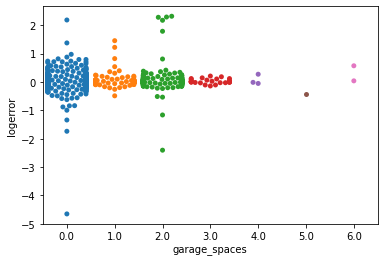

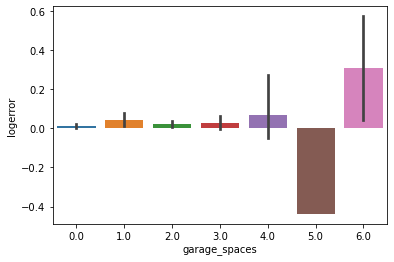

In [28]:
# Calling explore.py; applying plot function to 'garage_spaces' and 'home_value'
explore.plot_categorical_and_continuous_vars(train, 'garage_spaces', 'logerror')

In [29]:
# Use the scipy stats function pearsonr to calculate the correlation coefficient and the p-value.
alpha = 0.05

r_garage , p_garage = pearsonr(x = train['garage_spaces'], y = train['logerror'])

r_garage , p_garage

if p_garage < alpha:
    print('The number of garage spaces is correlated with logerror.')
    print('The correlation coefficient is {}.'.format(r_garage))
else:
    print('The number of garage spaces is NOT correlated with logerror.')

The number of garage spaces is correlated with logerror.
The correlation coefficient is 0.021635652375575822.


#### Answer 3: Yes, higher numbers of garage spaces correlate with higher logerror
Following our statistical test, we indicate that this feature is correlated with logerror, meaning that there is statistical significance behind the claim that more garage spaces results in a higher logerror. Thus we move forward with this feature.

#### 4. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

- Ho = Population Means of the logerrors for Orange county, LA County, and Ventura County are all equal
- Ha = Population Means of the logerrors for Orange county, LA County, and Ventura County are NOT all equal

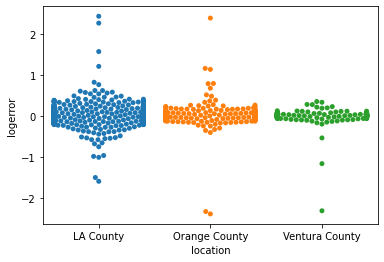

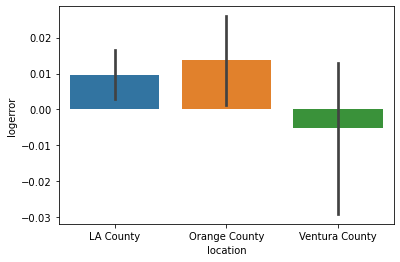

In [30]:
# Calling explore.py; applying plot function to 'location' and 'home_value'
explore.plot_categorical_and_continuous_vars(train, 'location', 'logerror')

In [31]:
# Assigning separate dfs to select only values within a certain county code
Orange = train[train.location == 'Orange County'].logerror
LA = train[train.location == 'LA County'].logerror
Ventura = train[train.location == 'Ventura County'].logerror

In [32]:
# ANOVA test for comparing 3 separate cat vars
f, p = stats.f_oneway(Orange, LA, Ventura)
f, p

print(f'f-statistic by ANOVA Test: {f}, p-value: {p}')

# set alpha : 0.05
if p < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

f-statistic by ANOVA Test: 11.01573329874872, p-value: 1.6514954460181095e-05
We can reject the null hypothesis


#### Answer 4: Yes, location by county does affect logerror
Following our statistical test, we reject the null, meaning that there is statistical significance behind the claim that the population means of the logerror for each county are NOT equal. Thus we move forward with this feature.

## Clustering Questions

#### 1. Does bedroom, bathroom, and garage space count affect log error?


#### 2.  Does location, latitude, and longitude affect log error?


#### 3. Do sqft, lot_sq_ft, and bath_bed_ratio affect log error?


### 1. Does bedroom, bathroom, and garage space count affect log error?

#### a. Is there a relationship between bedroom count and logerror?

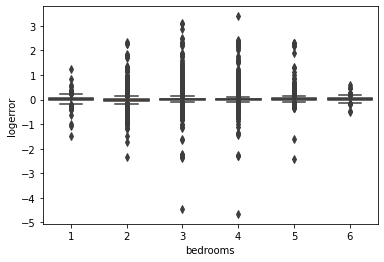

In [64]:
sns.boxplot(data=train, y='logerror', x='bedrooms')
plt.show()

In [66]:
#H0: Variances are equal
#Ha: Variances are not equal

stats.levene(
    train[train.bedrooms <= 3].logerror,
    train[train.bedrooms > 3].logerror,
)

LeveneResult(statistic=10.720146169682682, pvalue=0.001061085210039708)

**Conclusion:** \
Our p-value is less than our alpha, so we reject the null hypothesis that the variance in logerror is the same for bedrooms counts above and below 3.

(ie.e the variance is not equal)

In [68]:
stats.ttest_ind(
    train[train.bedrooms <= 3].logerror,
    train[train.bedrooms > 3].logerror,
    equal_var=False,
)

Ttest_indResult(statistic=-5.401583561154031, pvalue=6.685407679258316e-08)

**Conclusion:** \
We reject the null hypothesis that the average logerror for 3 or less bedrooms is the same as the average logerror for 4 or more bedrooms.

#### b. Is there a relationship between bathroom count and logerror?

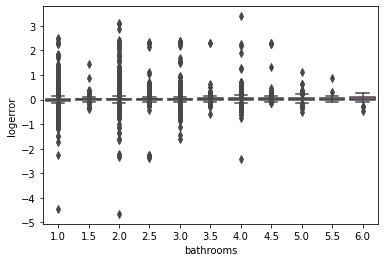

In [69]:
sns.boxplot(data=train, y='logerror', x='bathrooms')
plt.show()

In [70]:
#H0: Variances are equal
#Ha: Variances are not equal

stats.levene(
    train[train.bathrooms <= 3.5].logerror,
    train[train.bathrooms > 3.5].logerror,
)

LeveneResult(statistic=16.3784151915, pvalue=5.2016901629995204e-05)

**Conclusion:** \
Our p-value is more than our alpha, so we fail to reject the null hypothesis that the variance in logerror is the same for bedrooms counts above and below 3.

(ie.e the variance is equal)

In [71]:
stats.ttest_ind(
    train[train.bathrooms <= 3.5].logerror,
    train[train.bathrooms > 3.5].logerror,
    equal_var=True,
)

Ttest_indResult(statistic=-5.8483328474701235, pvalue=5.022374162776277e-09)

**Conclusion:** \
We reject the null hypothesis that the average logerror for 3.5 or less bathrooms is the same as the average logerror for 4 or more bathrooms.

#### c. Is there a relationship between garage space count and logerror?

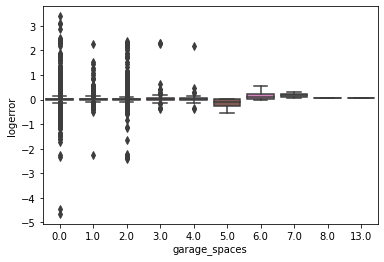

In [72]:
sns.boxplot(data=train, y='logerror', x='garage_spaces')
plt.show()

In [73]:
#H0: Variances are equal
#Ha: Variances are not equal

stats.levene(
    train[train.garage_spaces <= 4].logerror,
    train[train.garage_spaces > 4].logerror,
)

LeveneResult(statistic=5.541990701777045, pvalue=0.018572570342954117)

**Conclusion:** \
Our p-value is less than our alpha, so we reject the null hypothesis that the variance in logerror is the same for garage space counts above and below 4.

(ie.e the variance is not equal)

In [74]:
stats.ttest_ind(
    train[train.garage_spaces <= 4].logerror,
    train[train.garage_spaces > 4].logerror,
    equal_var=False,
)

Ttest_indResult(statistic=0.31589171474565314, pvalue=0.7564351562339428)

**Conclusion:** \
We fail to reject the null hypothesis that the average logerror for 4 or less garage spaces is the same as the average logerror for 4 or more garage spaces.

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27020 entries, 17293 to 1285
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27020 non-null  float64 
 1   transactiondate             27020 non-null  object  
 2   bathrooms                   27020 non-null  float64 
 3   bedrooms                    27020 non-null  int64   
 4   sq_ft                       27020 non-null  int64   
 5   finishedsquarefeet12        27020 non-null  float64 
 6   location                    27020 non-null  object  
 7   full_bathrooms              27020 non-null  float64 
 8   garage_spaces               27020 non-null  float64 
 9   garagetotalsqft             27020 non-null  float64 
 10  latitude                    27020 non-null  float64 
 11  longitude                   27020 non-null  float64 
 12  lot_sq_ft                   27020 non-null  float64 
 13  poolcnt      

#### d. Is there a relationship between age of a home and logerror?

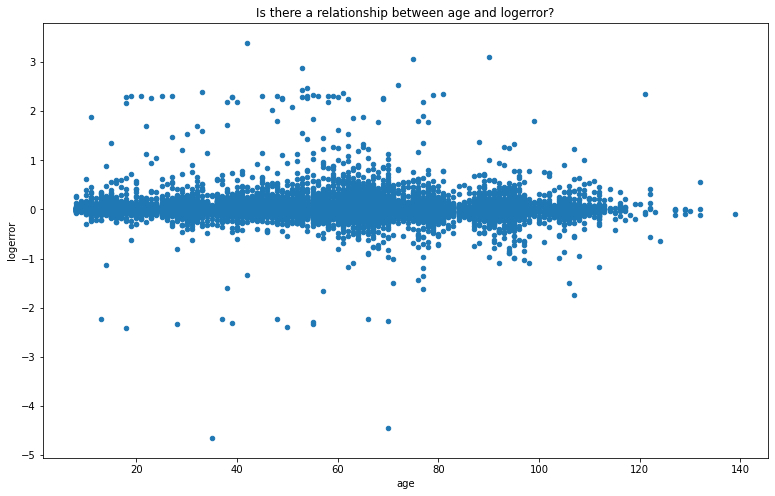

In [99]:
train.plot.scatter(y='logerror', x='age', title='Is there a relationship between age and logerror?', figsize=(13, 8))
plt.show()

#### If we control for age, does logerror differ across bedroom and bathroom count?

### 3. Do sqft, lot_sq_ft, and bath_bed_ratio affect log error?

#### a. Is there a relationship between sqft and logerror?

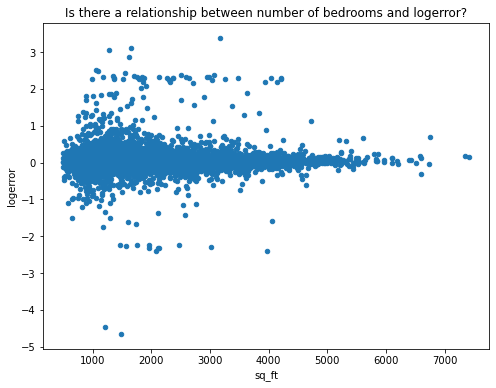

In [33]:
train.plot.scatter(
    x="sq_ft",
    y="logerror",
    title='Is there a relationship between number of bedrooms and logerror?',
    figsize=(8, 6),
)
plt.show()

In [34]:
train.sq_ft.describe()

count              27,020.00
mean                1,812.24
std                   774.22
min                   500.00
25%                 1,256.00
50%                 1,626.00
75%                 2,196.00
max                 7,416.00
Name: sq_ft, dtype: float64

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27020 entries, 17293 to 1285
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27020 non-null  float64 
 1   transactiondate             27020 non-null  object  
 2   bathrooms                   27020 non-null  float64 
 3   bedrooms                    27020 non-null  int64   
 4   sq_ft                       27020 non-null  int64   
 5   finishedsquarefeet12        27020 non-null  float64 
 6   location                    27020 non-null  object  
 7   full_bathrooms              27020 non-null  float64 
 8   garage_spaces               27020 non-null  float64 
 9   garagetotalsqft             27020 non-null  float64 
 10  latitude                    27020 non-null  float64 
 11  longitude                   27020 non-null  float64 
 12  lot_sq_ft                   27020 non-null  float64 
 13  poolcnt      

#### b. Is there a relationship between lot_sq_ft and logerror?

In [36]:
train.lot_sq_ft.describe()

count              27,020.00
mean                9,573.33
std                20,092.40
min                   800.00
25%                 5,606.00
50%                 6,807.00
75%                 8,563.00
max               672,149.00
Name: lot_sq_ft, dtype: float64

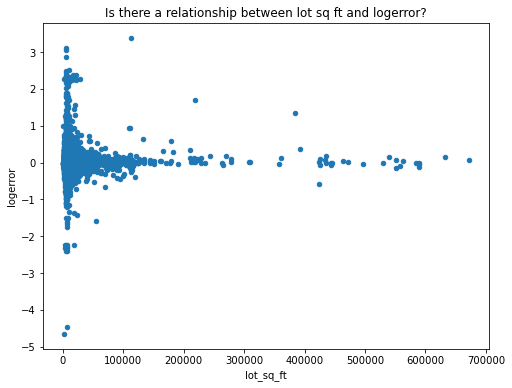

In [37]:
train.plot.scatter(
    x="lot_sq_ft",
    y="logerror",
    title='Is there a relationship between lot sq ft and logerror?',
    figsize=(8, 6),
)
plt.show()

#### c. Is there a relationship between bath_bed_ratio and logerror?

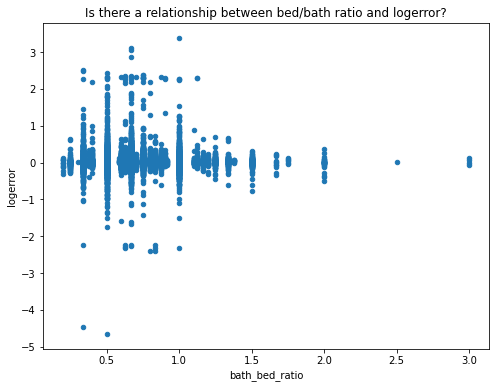

In [39]:
train.plot.scatter(
    x="bath_bed_ratio",
    y="logerror",
    title='Is there a relationship between bed/bath ratio and logerror?',
    figsize=(8, 6),
)
plt.show()

### Scaling

Features to scale:
1. latitude
2. longitude
3. sqft
4. propertycountylandusecode
5. lot_sq_ft

In [40]:
# Calling our model.py; Assigning df variables to our called function, `scale_data`
train_scaled, validate_scaled, test_scaled = model.scale_data(train, validate, test)

In [41]:
# Splitting train, validate, and test dfs on x and y FOR SCALED DF will occur AFTER clustering
x_train_scaled = train_scaled.drop(columns=['logerror'])
x_validate_scaled = validate_scaled.drop(columns=['logerror'])
x_test_scaled = test_scaled.drop(columns=['logerror'])

y_train_scaled = train_scaled['logerror']
y_validate_scaled = validate_scaled['logerror']
y_test_scaled = test_scaled['logerror']

In [42]:
train.head()

,logerror,transactiondate,bathrooms,bedrooms,sq_ft,finishedsquarefeet12,location,full_bathrooms,garage_spaces,garagetotalsqft,...,landtaxvaluedollarcnt,censustractandblock,decade_built,county_encoded,age,censustract_bin,bath_bed_ratio,census_county_bin,census_quarter_bin,age_bin
17293,-0.00,2017-04-12,2.50,3,2335,"2,335.00",Ventura County,2.00,1.00,0.00,...,"82,448.00","61,110,084,011,004.00",60s,2,54,2,0.83,Ventura,"(60590423105000.0, 483030105084015.0]",0.40
50005,0.03,2017-09-06,2.00,3,1361,"1,361.00",LA County,2.00,0.00,0.00,...,"460,000.00","60,375,741,002,004.00",50s,0,66,0,0.67,LA,"(60374016031004.0, 60376025042001.0]",0.47
35083,0.07,2017-06-29,3.00,2,1497,"1,497.00",LA County,3.00,0.00,0.00,...,"606,979.00","60,372,624,001,003.00",50s,0,62,0,1.50,LA,"(60371011101000.0, 60374016031004.0]",0.47
18080,0.13,2017-04-17,2.00,4,1430,"1,430.00",LA County,2.00,0.00,0.00,...,"459,603.00","60,372,951,032,017.00",60s,0,56,0,0.50,LA,"(60371011101000.0, 60374016031004.0]",0.40
9668,-0.09,2017-03-03,2.00,2,1570,"1,570.00",LA County,2.00,0.00,0.00,...,"139,632.00","60,371,345,221,003.00",40s,0,71,0,1.00,LA,"(60371011101000.0, 60374016031004.0]",0.53


In [43]:
train_scaled.head()

,logerror,transactiondate,bathrooms,bedrooms,sq_ft,finishedsquarefeet12,location,full_bathrooms,garage_spaces,garagetotalsqft,...,landtaxvaluedollarcnt,censustractandblock,decade_built,county_encoded,age,censustract_bin,bath_bed_ratio,census_county_bin,census_quarter_bin,age_bin
17293,-0.00,2017-04-12,0.30,0.40,0.27,"2,335.00",Ventura County,2.00,0.08,0.00,...,"82,448.00","61,110,084,011,004.00",60s,2,54,2,0.83,Ventura,"(60590423105000.0, 483030105084015.0]",0.40
50005,0.03,2017-09-06,0.20,0.40,0.12,"1,361.00",LA County,2.00,0.00,0.00,...,"460,000.00","60,375,741,002,004.00",50s,0,66,0,0.67,LA,"(60374016031004.0, 60376025042001.0]",0.47
35083,0.07,2017-06-29,0.40,0.20,0.14,"1,497.00",LA County,3.00,0.00,0.00,...,"606,979.00","60,372,624,001,003.00",50s,0,62,0,1.50,LA,"(60371011101000.0, 60374016031004.0]",0.47
18080,0.13,2017-04-17,0.20,0.60,0.13,"1,430.00",LA County,2.00,0.00,0.00,...,"459,603.00","60,372,951,032,017.00",60s,0,56,0,0.50,LA,"(60371011101000.0, 60374016031004.0]",0.40
9668,-0.09,2017-03-03,0.20,0.20,0.15,"1,570.00",LA County,2.00,0.00,0.00,...,"139,632.00","60,371,345,221,003.00",40s,0,71,0,1.00,LA,"(60371011101000.0, 60374016031004.0]",0.53


In [44]:
x_train_scaled.head()

,transactiondate,bathrooms,bedrooms,sq_ft,finishedsquarefeet12,location,full_bathrooms,garage_spaces,garagetotalsqft,latitude,...,landtaxvaluedollarcnt,censustractandblock,decade_built,county_encoded,age,censustract_bin,bath_bed_ratio,census_county_bin,census_quarter_bin,age_bin
17293,2017-04-12,0.30,0.40,0.27,"2,335.00",Ventura County,2.00,0.08,0.00,"34,287,394.00",...,"82,448.00","61,110,084,011,004.00",60s,2,54,2,0.83,Ventura,"(60590423105000.0, 483030105084015.0]",0.40
50005,2017-09-06,0.20,0.40,0.12,"1,361.00",LA County,2.00,0.00,0.00,"33,814,964.00",...,"460,000.00","60,375,741,002,004.00",50s,0,66,0,0.67,LA,"(60374016031004.0, 60376025042001.0]",0.47
35083,2017-06-29,0.40,0.20,0.14,"1,497.00",LA County,3.00,0.00,0.00,"34,057,040.00",...,"606,979.00","60,372,624,001,003.00",50s,0,62,0,1.50,LA,"(60371011101000.0, 60374016031004.0]",0.47
18080,2017-04-17,0.20,0.60,0.13,"1,430.00",LA County,2.00,0.00,0.00,"33,760,649.00",...,"459,603.00","60,372,951,032,017.00",60s,0,56,0,0.50,LA,"(60371011101000.0, 60374016031004.0]",0.40
9668,2017-03-03,0.20,0.20,0.15,"1,570.00",LA County,2.00,0.00,0.00,"34,207,718.00",...,"139,632.00","60,371,345,221,003.00",40s,0,71,0,1.00,LA,"(60371011101000.0, 60374016031004.0]",0.53


In [45]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27020 entries, 17293 to 1285
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27020 non-null  float64 
 1   transactiondate             27020 non-null  object  
 2   bathrooms                   27020 non-null  float64 
 3   bedrooms                    27020 non-null  float64 
 4   sq_ft                       27020 non-null  float64 
 5   finishedsquarefeet12        27020 non-null  float64 
 6   location                    27020 non-null  object  
 7   full_bathrooms              27020 non-null  float64 
 8   garage_spaces               27020 non-null  float64 
 9   garagetotalsqft             27020 non-null  float64 
 10  latitude                    27020 non-null  float64 
 11  longitude                   27020 non-null  float64 
 12  lot_sq_ft                   27020 non-null  float64 
 13  poolcnt      

## Creating Clusters

#### Cluster 1: bedrooms, bathrooms, age [EDIT AGE INPUTS]

In [46]:
# list of variables I will cluster on. 
cluster_vars = ['bedrooms', 'bathrooms', 'age_bin']
cluster_name = 'home_space_cluster'
k_range = range(2,20)

In [47]:
def find_k(x_train_scaled, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(x_train_scaled[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

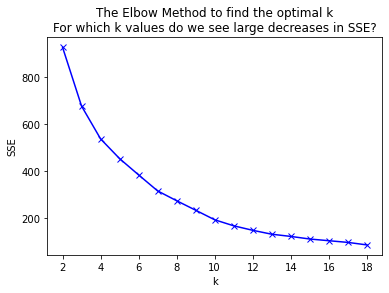

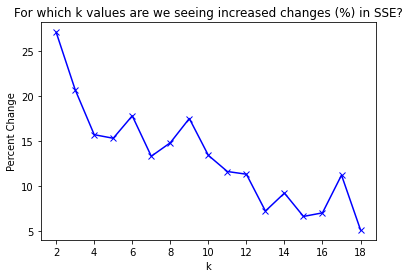

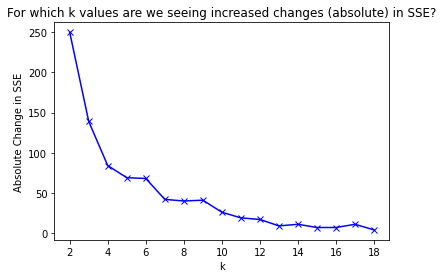

,k,sse,delta,pct_delta
0,2,925.65,250.00,27.10
1,3,675.16,139.00,20.70
2,4,535.71,84.00,15.70
3,5,451.71,69.00,15.30
4,6,382.40,68.00,17.80
5,7,314.28,42.00,13.30
6,8,272.53,40.00,14.80
7,9,232.14,41.00,17.50
8,10,191.48,26.00,13.40
9,11,165.90,19.00,11.60


In [48]:
find_k(x_train_scaled, cluster_vars, k_range)

In [49]:
k = 7
# as reminders: 
cluster_vars = ['latitude', 'longitude', 'age_bin']
cluster_name = 'area_cluster'

In [50]:
# create kmean object
kmeans = KMeans(n_clusters=7, random_state = 13)

# fit to train and assign cluster ids to observations
kmeans.fit(x_train_scaled[cluster_vars])

cluster1 = kmeans.predict(x_train_scaled[cluster_vars])
cluster1

array([5, 4, 5, ..., 0, 1, 4], dtype=int32)

In [51]:
train_scaled['area_cluster'] = cluster1

#### Cluster 2: location, latitude, longitude

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27020 entries, 17293 to 1285
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   logerror                    27020 non-null  float64 
 1   transactiondate             27020 non-null  object  
 2   bathrooms                   27020 non-null  float64 
 3   bedrooms                    27020 non-null  int64   
 4   sq_ft                       27020 non-null  int64   
 5   finishedsquarefeet12        27020 non-null  float64 
 6   location                    27020 non-null  object  
 7   full_bathrooms              27020 non-null  float64 
 8   garage_spaces               27020 non-null  float64 
 9   garagetotalsqft             27020 non-null  float64 
 10  latitude                    27020 non-null  float64 
 11  longitude                   27020 non-null  float64 
 12  lot_sq_ft                   27020 non-null  float64 
 13  poolcnt      

In [53]:
# list of variables I will cluster on. 
cluster_vars = ['county_encoded', 'latitude', 'longitude']
cluster_name = 'location_cluster'
k_range = range(2,20)

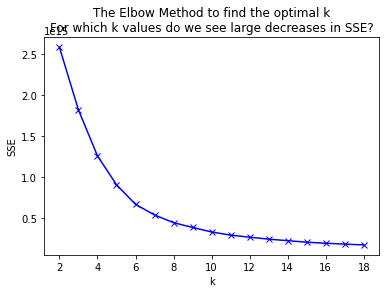

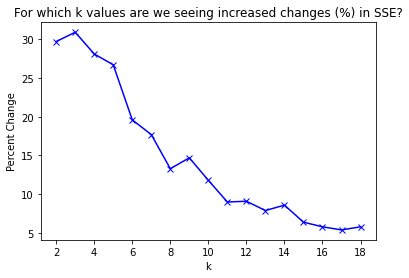

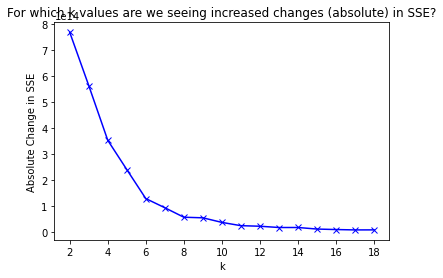

,k,sse,delta,pct_delta
0,2,"2,588,071,537,817,883.00","767,526,711,387,074.00",29.70
1,3,"1,820,544,826,430,809.50","563,256,262,562,674.00",30.90
2,4,"1,257,288,563,868,135.50","353,251,381,809,867.00",28.10
3,5,"904,037,182,058,268.38","241,013,380,146,302.00",26.70
4,6,"663,023,801,911,966.00","129,637,921,127,544.00",19.60
5,7,"533,385,880,784,422.38","94,568,322,977,534.00",17.70
6,8,"438,817,557,806,888.00","58,149,727,961,926.00",13.30
7,9,"380,667,829,844,961.88","55,903,971,658,868.00",14.70
8,10,"324,763,858,186,093.88","38,306,058,076,328.00",11.80
9,11,"286,457,800,109,765.75","25,745,437,806,376.00",9.00


In [54]:
find_k(x_train_scaled, cluster_vars, k_range)

In [55]:
# create kmean object
kmeans = KMeans(n_clusters=6, random_state = 13)

# fit to train and assign cluster ids to observations
kmeans.fit(x_train_scaled[cluster_vars])

cluster2 = kmeans.predict(x_train_scaled[cluster_vars])
cluster2

array([5, 4, 5, ..., 0, 1, 4], dtype=int32)

In [56]:
train_scaled['location_cluster'] = cluster2

In [104]:
train_scaled.head()

,logerror,transactiondate,bathrooms,bedrooms,sq_ft,finishedsquarefeet12,location,full_bathrooms,garage_spaces,garagetotalsqft,...,county_encoded,age,censustract_bin,bath_bed_ratio,census_county_bin,census_quarter_bin,age_bin,area_cluster,location_cluster,size_cluster
17293,-0.00,2017-04-12,0.30,0.40,0.27,"2,335.00",Ventura County,2.00,0.08,0.00,...,2,54,2,0.83,Ventura,"(60590423105000.0, 483030105084015.0]",0.40,5,5,3
50005,0.03,2017-09-06,0.20,0.40,0.12,"1,361.00",LA County,2.00,0.00,0.00,...,0,66,0,0.67,LA,"(60374016031004.0, 60376025042001.0]",0.47,4,4,4
35083,0.07,2017-06-29,0.40,0.20,0.14,"1,497.00",LA County,3.00,0.00,0.00,...,0,62,0,1.50,LA,"(60371011101000.0, 60374016031004.0]",0.47,5,5,2
18080,0.13,2017-04-17,0.20,0.60,0.13,"1,430.00",LA County,2.00,0.00,0.00,...,0,56,0,0.50,LA,"(60371011101000.0, 60374016031004.0]",0.40,1,1,1
9668,-0.09,2017-03-03,0.20,0.20,0.15,"1,570.00",LA County,2.00,0.00,0.00,...,0,71,0,1.00,LA,"(60371011101000.0, 60374016031004.0]",0.53,5,5,0


#### Cluster 3: sqft, lot_sq_ft, bath_bed_ratio

In [58]:
# list of variables I will cluster on. 
cluster_vars = ['sq_ft', 'lot_sq_ft', 'bath_bed_ratio']
cluster_name = 'size_cluster'
k_range = range(2,20)

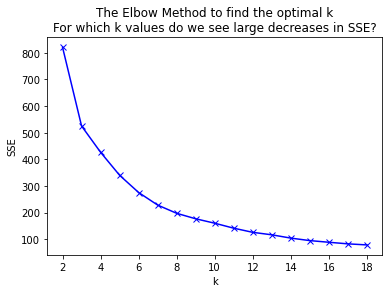

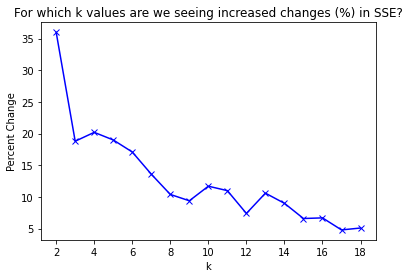

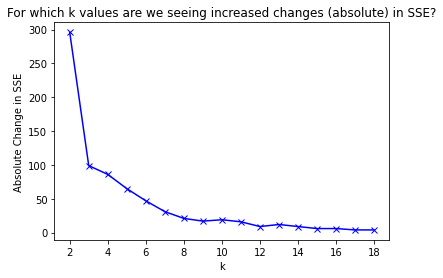

,k,sse,delta,pct_delta
0,2,820.84,296.00,36.00
1,3,525.17,99.00,18.80
2,4,426.47,86.00,20.20
3,5,340.12,65.00,19.00
4,6,275.46,47.00,17.10
5,7,228.33,31.00,13.60
6,8,197.38,21.00,10.40
7,9,176.82,17.00,9.40
8,10,160.20,19.00,11.70
9,11,141.50,16.00,11.00


In [59]:
find_k(x_train_scaled, cluster_vars, k_range)

In [60]:
# create kmean object
kmeans = KMeans(n_clusters=3, random_state = 13)

# fit to train and assign cluster ids to observations
kmeans.fit(x_train_scaled[cluster_vars])

cluster3 = kmeans.predict(x_train_scaled[cluster_vars])
cluster3

array([3, 4, 2, ..., 4, 1, 1], dtype=int32)

In [61]:
train_scaled['size_cluster'] = cluster3

In [105]:
train_scaled.head()

,logerror,transactiondate,bathrooms,bedrooms,sq_ft,finishedsquarefeet12,location,full_bathrooms,garage_spaces,garagetotalsqft,...,county_encoded,age,censustract_bin,bath_bed_ratio,census_county_bin,census_quarter_bin,age_bin,area_cluster,location_cluster,size_cluster
17293,-0.00,2017-04-12,0.30,0.40,0.27,"2,335.00",Ventura County,2.00,0.08,0.00,...,2,54,2,0.83,Ventura,"(60590423105000.0, 483030105084015.0]",0.40,5,5,3
50005,0.03,2017-09-06,0.20,0.40,0.12,"1,361.00",LA County,2.00,0.00,0.00,...,0,66,0,0.67,LA,"(60374016031004.0, 60376025042001.0]",0.47,4,4,4
35083,0.07,2017-06-29,0.40,0.20,0.14,"1,497.00",LA County,3.00,0.00,0.00,...,0,62,0,1.50,LA,"(60371011101000.0, 60374016031004.0]",0.47,5,5,2
18080,0.13,2017-04-17,0.20,0.60,0.13,"1,430.00",LA County,2.00,0.00,0.00,...,0,56,0,0.50,LA,"(60371011101000.0, 60374016031004.0]",0.40,1,1,1
9668,-0.09,2017-03-03,0.20,0.20,0.15,"1,570.00",LA County,2.00,0.00,0.00,...,0,71,0,1.00,LA,"(60371011101000.0, 60374016031004.0]",0.53,5,5,0


## Predicting Log Error
In fitting and evaluating models on our data, the metric we choose to use to evaluate is root mean square error (RMSE). This allows us to compare the mean error of a model in the actual unit of our target variable, logerror. Thus, this is the most valuable metric for understanding the performance of our models.


In [ ]:
# Dropping extraneous features no longer relevant to modeling
train_scaled = train_scaled.drop(columns = ['location', 'lot_sq_ft', 'decade_built'])
validate_scaled = validate_scaled.drop(columns = ['location', 'lot_sq_ft', 'decade_built'])
test_scaled = test_scaled.drop(columns = ['location', 'lot_sq_ft', 'decade_built'])

**Note**
I now perform my scale split between x and y, following creation of my clusters

In [106]:
# Splitting train, validate, and test dfs on x and y FOR SCALED DF with clusters
x_train_scaled = train_scaled.drop(columns=['logerror'])
x_validate_scaled = validate_scaled.drop(columns=['logerror'])
x_test_scaled = test_scaled.drop(columns=['logerror'])

y_train_scaled = train_scaled['logerror']
y_validate_scaled = validate_scaled['logerror']
y_test_scaled = test_scaled['logerror']

#### Dropping 

#### Baseline
In order to compare our models, I'll create a baseline from our train dataset actual home values

In [ ]:
#Establish baselines for the train and validation datasets
baseline = train['logerror'].mean()

# Create new columns for baseline
train['baseline'] = baseline
validate['baseline'] = baseline
test['baseline'] = baseline

# Find RMSE for each sample
train_rmse = sqrt(mean_squared_error(train['logerror'], train.baseline))
validate_rmse = sqrt(mean_squared_error(validate['logerror'], validate.baseline))
test_rmse = sqrt(mean_squared_error(test['logerror'], test.baseline))

print('Train baseline RMSE: {}.'.format(train_rmse))
print('Validation baseline RMSE: {}.'.format(validate_rmse))
print('Test baseline RMSE: {}.'.format(test_rmse))

Train baseline RMSE: 272118.84506691294.
Validation baseline RMSE: 268096.9138598306.
Test baseline RMSE: 270460.22757535306.


I'll now create:
- `train_predictions` df for our train predictions 
- `predictions` df for our validate predictions

In [ ]:
# Creating dfs for train and validate predictions
train_predictions = pd.DataFrame({
    'actual': train['logerror'],
    'baseline': baseline
}) 

predictions = pd.DataFrame({
    'actual': validate['logerror'],
    'baseline': baseline
}) 

### Fit 3 Best Models
- Linear Regression (`simple_lm`)
- Lasso-Lars Regression (`lasso_lars`)
- TweediRegressor (`glm`)

#### Fitting Linear Regression

In [ ]:
# Create an instance of the model and fit it to my data
lm = LinearRegression().fit(x_train_scaled, y_train_scaled)

# Predicting on train and validate and adding column to both predictions dfs 
train_predictions['simple_lm'] = lm.predict(x_train_scaled)
predictions['simple_lm'] = lm.predict(x_validate_scaled)

#### Fitting Lasso-Lars Regression

In [ ]:
# Create the model object
lars = LassoLars(alpha=1)

# Fit the model to our training data
lars.fit(x_train_scaled, y_train_scaled)

# predict train
train_predictions['lasso_lars'] = lars.predict(x_train_scaled)

# Predict validate
predictions['lasso_lars'] = lars.predict(x_validate_scaled)

#### Fitting TweediRegressor

In [ ]:
# Create the model object
glm = TweedieRegressor(power=0, alpha=1)

# Fit the model to our training data
glm.fit(x_train_scaled, y_train_scaled)

# predict train, add to df
train_predictions['glm'] = glm.predict(x_train_scaled)

# Predict validate, add to df
predictions['glm'] = glm.predict(x_validate_scaled)

#### Evaluating Models using root mean squared error (RMSE)

In [ ]:
# Calculate root mean squared error (RMSE) for every column in the train_predictions df
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(train_predictions.actual, y_predicted))

print('Train baseline RMSE: {}.'.format(train_rmse))
train_predictions.apply(calculate_rmse).sort_values()

Train baseline RMSE: 272118.84506691294.


actual             0.000000
simple_lm     221910.865863
lasso_lars    221921.119966
glm           259201.362112
baseline      272118.845067
dtype: float64

In [ ]:
# Calculate root mean squared error (RMSE) for every column in the predictions df
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(predictions.actual, y_predicted))

print('Validation baseline RMSE: {}.'.format(validate_rmse))
predictions.apply(calculate_rmse).sort_values()

Validation baseline RMSE: 268096.9138598306.


actual             0.000000
simple_lm     217319.455730
lasso_lars    217338.051334
glm           255170.615728
baseline      268096.913860
dtype: float64

##### Model Conclusion: 
Based on comparing our train and validate predictions, we can say with confidence that Linear Regression (`simple_lm`) is our best performing model. We will now predict and evaluate this model on our test dataset

### Predict and Evaluate Test dataset
Like with train and validate, I'll create a predictions df to collect predictions and then evaluate.

In [ ]:
test_predictions = pd.DataFrame({
    'actual': test['home_value'],
    'baseline': baseline
}) 

In [ ]:
#Create an instance of the model and fit it to my data
lm = LinearRegression().fit(x_train_scaled, y_train_scaled)

# Predict on test
test_predictions['simple_lm'] = lm.predict(x_test_scaled)

test_predictions.head()

,actual,baseline,simple_lm
21816,79477,377672.367962,399792.291476
29518,611458,377672.367962,611638.158403
49732,324879,377672.367962,215360.414827
41274,59652,377672.367962,278717.963066
47604,215371,377672.367962,395783.936060


In [ ]:
# Calculate root mean squared error (RMSE) for the test_predictions df
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(test_predictions.actual, y_predicted))

print('Test baseline RMSE: {}.'.format(test_rmse))
test_predictions.apply(calculate_rmse).sort_values()

Test baseline RMSE: 270460.22757535306.


actual            0.000000
simple_lm    222613.258374
baseline     270460.227575
dtype: float64

In [ ]:
test_result = test_predictions.apply(calculate_rmse).sort_values()

In [ ]:
# Finding by how much my model beat baseline 
model_percent = abs((test_result['simple_lm'] - test_rmse) / ((test_result['simple_lm'] + test_rmse) / 2))

print("The model beat baseline by: "+"{:.2%}".format(model_percent))

The model beat baseline by: 19.41%


**Success!** \
From this calculation on our test dataset, we can observe that my Linear Regression model successfully beat our baseline.

**Our model performs 19.5% better than baseline**

## Conclusion